# Analysis of the Loan Data from Prosper by Barbara Stempien

## Table of Contents¶

* [Introduction](#Introduction)
* [Data Wrangling](#Data-Wrangling)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Conclusions](#Conclusions)


## Introduction

Prosper loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

In [3]:
# load packages
library(ggplot2)
library(repr)
library(ggthemes)
library(dplyr)
library(maps)
library(mapdata)
library(openintro)
library(waffle)
library(ggcorrplot)
library(scales)
library(ggpubr)
library(gridExtra)

In [4]:
# load the prosper loan dataset
loan_dataset <- read.csv('data/prosperLoanData.csv', na.strings = c("", "NA"))

In [5]:
# display shape of dataset; rows x columns
dim(loan_dataset)

[1] 113937     81

In [6]:
# display few lines
head(loan_dataset)

ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0,0,0,0,1,0,0,0,258
10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NA,36,Current,NA,0.12016,0.0920,0.0820,...,0.00,0,0,0,0,1,0,0,0,1
0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0,0,0,0,1,0,0,0,41
0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NA,36,Current,NA,0.12528,0.0974,0.0874,...,-108.01,0,0,0,0,1,0,0,0,158
0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NA,36,Current,NA,0.24614,0.2085,0.1985,...,-60.27,0,0,0,0,1,0,0,0,20
0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NA,60,Current,NA,0.15425,0.1314,0.1214,...,-25.33,0,0,0,0,1,0,0,0,1


## Data Wrangling

In [7]:
# subset the dataframe to the following columns
subset <- c("ListingKey",
            "LoanStatus",
            "ListingCreationDate",
            "ClosedDate",
            "ListingCategory..numeric.",
            "Term",
            "BorrowerRate",
            "LoanOriginalAmount",
            "MonthlyLoanPayment",
            "BorrowerState",
            "IsBorrowerHomeowner",  
            "Occupation",
            "EmploymentStatus",
            "EmploymentStatusDuration",
            "StatedMonthlyIncome",
            "DebtToIncomeRatio",
            "ProsperRating..Alpha.",
            "ProsperScore",           
            "CreditScoreRangeLower",
            "CreditScoreRangeUpper",
            "OpenCreditLines",
            "TotalCreditLinespast7years",
            "OpenRevolvingAccounts",
            "OpenRevolvingMonthlyPayment",
            "CurrentDelinquencies",
            "AmountDelinquent",
            "DelinquenciesLast7Years",
            "PublicRecordsLast10Years",
            "RevolvingCreditBalance",
            "BankcardUtilization",
            "TotalProsperLoans",
            "ProsperPrincipalBorrowed",
            "ProsperPrincipalOutstanding",
            "ProsperPaymentsLessThanOneMonthLate",
            "ProsperPaymentsOneMonthPlusLate"
           )

In [8]:
# subset dataframe
df <- loan_dataset[subset]

In [9]:
# replace NAs with 0
df[is.na(df)] <- 0

Warning message in `[<-.factor`(`*tmp*`, thisvar, value = 0):
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, thisvar, value = 0):
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, thisvar, value = 0):
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, thisvar, value = 0):
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, thisvar, value = 0):
"invalid factor level, NA generated"

In [10]:
# display type of each variable
str(df)

'data.frame':	113937 obs. of  35 variables:
 $ ListingKey                         : Factor w/ 113066 levels "00003546482094282EF90E5",..: 7180 7193 6647 6669 6686 6689 6699 6706 6687 6687 ...
 $ LoanStatus                         : Factor w/ 12 levels "Cancelled","Chargedoff",..: 3 4 3 4 4 4 4 4 4 4 ...
 $ ListingCreationDate                : Factor w/ 113064 levels "2005-11-09 20:44:28.847000000",..: 14184 111894 6429 64760 85967 100310 72556 74019 97834 97834 ...
 $ ClosedDate                         : Factor w/ 2802 levels "2005-11-25 00:00:00",..: 1137 NA 1262 NA NA NA NA NA NA NA ...
 $ ListingCategory..numeric.          : int  0 2 0 16 2 1 1 2 7 7 ...
 $ Term                               : int  36 36 36 36 36 60 36 36 36 36 ...
 $ BorrowerRate                       : num  0.158 0.092 0.275 0.0974 0.2085 ...
 $ LoanOriginalAmount                 : int  9425 10000 3001 10000 15000 15000 3000 10000 10000 10000 ...
 $ MonthlyLoanPayment                 : num  330 319 123 321 564 ...

In [11]:
# convert Loan Status to factor with 7 levels
cat("\nBefore conversion: \n\n")
str(df$LoanStatus)
table(df$LoanStatus)

# https://stackoverflow.com/a/19410249/7382214
levels(df$LoanStatus) <- list(Current = "Current",
                              Completed = "Completed",
                              "Charged Off" = "Chargedoff",
                              Defaulted = "Defaulted",
                              "Past Due" = c("Past Due (>120 days)",
                                        "Past Due (1-15 days)",
                                        "Past Due (16-30 days)",
                                        "Past Due (31-60 days)",
                                        "Past Due (61-90 days)",
                                        "Past Due (91-120 days)"),
                              "Final Payment" = "FinalPaymentInProgress",
                              Cancelled = "Cancelled")
cat("\nAfter conversion: \n\n")
str(df$LoanStatus)
table(df$LoanStatus)


Before conversion: 

 Factor w/ 12 levels "Cancelled","Chargedoff",..: 3 4 3 4 4 4 4 4 4 4 ...



             Cancelled             Chargedoff              Completed 
                     5                  11992                  38074 
               Current              Defaulted FinalPaymentInProgress 
                 56576                   5018                    205 
  Past Due (>120 days)   Past Due (1-15 days)  Past Due (16-30 days) 
                    16                    806                    265 
 Past Due (31-60 days)  Past Due (61-90 days) Past Due (91-120 days) 
                   363                    313                    304 


After conversion: 

 Factor w/ 7 levels "Current","Completed",..: 2 1 2 1 1 1 1 1 1 1 ...



      Current     Completed   Charged Off     Defaulted      Past Due 
        56576         38074         11992          5018          2067 
Final Payment     Cancelled 
          205             5 

In [12]:
# convert Listing Creation Date variable to date format
cat("\nBefore conversion: \n\n")
str(df$ListingCreationDate)

df$ListingCreationDate <- as.Date(df$ListingCreationDate)

cat("\nAfter conversion: \n\n")
str(df$ListingCreationDate)


Before conversion: 

 Factor w/ 113064 levels "2005-11-09 20:44:28.847000000",..: 14184 111894 6429 64760 85967 100310 72556 74019 97834 97834 ...

After conversion: 

 Date[1:113937], format: "2007-08-26" "2014-02-27" "2007-01-05" "2012-10-22" "2013-09-14" ...


In [13]:
# convert Term to ordered factor with 3 levels
cat("\nBefore conversion: \n\n")
str(df$Term)
table(df$Term)

df$Term <- factor(df$Term, levels=c(12,36,60), ordered=TRUE)

cat("\nAfter conversion: \n\n")
str(df$Term)
table(df$Term)


Before conversion: 

 int [1:113937] 36 36 36 36 36 60 36 36 36 36 ...



   12    36    60 
 1614 87778 24545 


After conversion: 

 Ord.factor w/ 3 levels "12"<"36"<"60": 2 2 2 2 2 3 2 2 2 2 ...



   12    36    60 
 1614 87778 24545 

In [14]:
# convert Closed Date variable to date format
cat("\nBefore conversion: \n\n")
str(df$ClosedDate)

df$ClosedDate <- as.Date(df$ClosedDate)

cat("\nAfter conversion: \n\n")
str(df$ClosedDate)


Before conversion: 

 Factor w/ 2802 levels "2005-11-25 00:00:00",..: 1137 NA 1262 NA NA NA NA NA NA NA ...

After conversion: 

 Date[1:113937], format: "2009-08-14" NA "2009-12-17" NA NA NA NA NA NA NA NA "2008-01-07" NA ...


In [15]:
# convert Prosper Rating to ordered factor with 8 levels
cat("\nBefore conversion: \n\n")
str(df$ProsperRating..Alpha.)
table(df$ProsperRating..Alpha.)

df$ProsperRating..Alpha. <- factor(df$ProsperRating..Alpha., levels=c("HR", "E", "D", "C","B","A","AA"), ordered=TRUE)

cat("\nAfter conversion: \n\n")
str(df$ProsperRating..Alpha.)
table(df$ProsperRating..Alpha.)


Before conversion: 

 Factor w/ 7 levels "A","AA","B","C",..: NA 1 NA 1 5 3 6 4 2 2 ...



    A    AA     B     C     D     E    HR 
14551  5372 15581 18345 14274  9795  6935 


After conversion: 

 Ord.factor w/ 7 levels "HR"<"E"<"D"<"C"<..: NA 6 NA 6 3 5 2 4 7 7 ...



   HR     E     D     C     B     A    AA 
 6935  9795 14274 18345 15581 14551  5372 

In [16]:
# convert Prosper Score to ordered factor with 12 levels
cat("\nBefore conversion: \n\n")
str(df$ProsperScore)
table(df$ProsperScore)

df$ProsperScore <- factor(df$ProsperScore, levels=c(0,1,2,3,4,5,6,7,8,9,10,11), ordered=TRUE)

cat("\nAfter conversion: \n\n")
str(df$ProsperScore)
table(df$ProsperScore)


Before conversion: 

 num [1:113937] 0 7 0 9 4 10 2 4 9 11 ...



    0     1     2     3     4     5     6     7     8     9    10    11 
29084   992  5766  7642 12595  9813 12278 10597 12053  6911  4750  1456 


After conversion: 

 Ord.factor w/ 12 levels "0"<"1"<"2"<"3"<..: 1 8 1 10 5 11 3 5 10 12 ...



    0     1     2     3     4     5     6     7     8     9    10    11 
29084   992  5766  7642 12595  9813 12278 10597 12053  6911  4750  1456 

In [17]:
# add column with Listing Category labels based on the documentation
cat("\nExisting column: \n\n")
str(df$ListingCategory..numeric.)
table(df$ListingCategory..numeric.)

df$ListingCategory <- factor(df$ListingCategory..numeric., labels=c('Not Available',
                                                                    'Debt Consolidation',
                                                                    'Home Improvement',
                                                                    'Business',
                                                                    'Personal Loan',
                                                                    'Student Use',
                                                                    'Auto',
                                                                    'Other',
                                                                    'Baby&Adoption',
                                                                    'Boat',
                                                                    'Cosmetic Procedure',
                                                                    'Engagement Ring',
                                                                    'Green Loans',
                                                                    'Household Expenses',
                                                                    'Large Purchases',
                                                                    'Medical/Dental',
                                                                    'Motorcycle',
                                                                    'RV',
                                                                    'Taxes',
                                                                    'Vacation',
                                                                    'Wedding Loans'))

# move ListingCategory column next to the ListingCategory..numeric.
df <- df[c(1:5,36,6:35)]

cat("\nNew column: \n\n")
str(df$ListingCategory)
table(df$ListingCategory)


Existing column: 

 int [1:113937] 0 2 0 16 2 1 1 2 7 7 ...



    0     1     2     3     4     5     6     7     8     9    10    11    12 
16965 58308  7433  7189  2395   756  2572 10494   199    85    91   217    59 
   13    14    15    16    17    18    19    20 
 1996   876  1522   304    52   885   768   771 


New column: 

 Factor w/ 21 levels "Not Available",..: 1 3 1 17 3 2 2 3 8 8 ...



     Not Available Debt Consolidation   Home Improvement           Business 
             16965              58308               7433               7189 
     Personal Loan        Student Use               Auto              Other 
              2395                756               2572              10494 
     Baby&Adoption               Boat Cosmetic Procedure    Engagement Ring 
               199                 85                 91                217 
       Green Loans Household Expenses    Large Purchases     Medical/Dental 
                59               1996                876               1522 
        Motorcycle                 RV              Taxes           Vacation 
               304                 52                885                768 
     Wedding Loans 
               771 

In [18]:
# convert State abbreviation to full name
cat("\nBefore conversion: \n\n")
str(df$BorrowerState)
table(df$BorrowerState)

df$BorrowerState <- abbr2state(df$BorrowerState)

cat("\nAfter conversion: \n\n")
str(df$BorrowerState)
table(df$BorrowerState)


Before conversion: 

 Factor w/ 51 levels "AK","AL","AR",..: 6 6 11 11 24 33 17 5 15 15 ...



   AK    AL    AR    AZ    CA    CO    CT    DC    DE    FL    GA    HI    IA 
  200  1679   855  1901 14717  2210  1627   382   300  6720  5008   409   186 
   ID    IL    IN    KS    KY    LA    MA    MD    ME    MI    MN    MO    MS 
  599  5921  2078  1062   983   954  2242  2821   101  3593  2318  2615   787 
   MT    NC    ND    NE    NH    NJ    NM    NV    NY    OH    OK    OR    PA 
  330  3084    52   674   551  3097   472  1090  6729  4197   971  1817  2972 
   RI    SC    SD    TN    TX    UT    VA    WA    WI    VT    WV    WY 
  435  1122   189  1737  6842   877  3278  3048  1842   207   391   150 


After conversion: 

 chr [1:113937] "Colorado" "Colorado" "Georgia" "Georgia" "Minnesota" ...



             Alabama               Alaska              Arizona 
                1679                  200                 1901 
            Arkansas           California             Colorado 
                 855                14717                 2210 
         Connecticut             Delaware District of Columbia 
                1627                  300                  382 
             Florida              Georgia               Hawaii 
                6720                 5008                  409 
               Idaho             Illinois              Indiana 
                 599                 5921                 2078 
                Iowa               Kansas             Kentucky 
                 186                 1062                  983 
           Louisiana                Maine             Maryland 
                 954                  101                 2821 
       Massachusetts             Michigan            Minnesota 
                2242                 35

In [19]:
# convert Is Borrower Homeowner to logical type
cat("\nBefore conversion: \n\n")
str(df$IsBorrowerHomeowner)
table(df$IsBorrowerHomeowner)

df$IsBorrowerHomeowner <- as.logical(df$IsBorrowerHomeowner)

cat("\nAfter conversion: \n\n")
str(df$IsBorrowerHomeowner)
table(df$IsBorrowerHomeowner)


Before conversion: 

 Factor w/ 2 levels "False","True": 2 1 1 2 2 2 1 1 2 2 ...



False  True 
56459 57478 


After conversion: 

 logi [1:113937] TRUE FALSE FALSE TRUE TRUE TRUE ...



FALSE  TRUE 
56459 57478 

In [20]:
# replace NA in Employment Status with Not Available
cat("\nBefore conversion: \n\n")
str(df$Occupation)
table(df$Occupation)

levels(df$Occupation)<-c(levels(df$Occupation),"Not Available") 
df$Occupation[is.na(df$Occupation)] <- "Not Available"

cat("\nAfter conversion: \n\n")
str(df$Occupation)
table(df$Occupation)


Before conversion: 

 Factor w/ 67 levels "Accountant/CPA",..: 36 42 36 51 20 42 49 28 23 23 ...



                    Accountant/CPA           Administrative Assistant 
                              3233                               3688 
                           Analyst                          Architect 
                              3602                                213 
                          Attorney                          Biologist 
                              1046                                125 
                        Bus Driver                         Car Dealer 
                               316                                180 
                           Chemist                      Civil Service 
                               145                               1457 
                            Clergy                           Clerical 
                               196                               3164 
               Computer Programmer                       Construction 
                              4478                               1790 
     


After conversion: 

 Factor w/ 68 levels "Accountant/CPA",..: 36 42 36 51 20 42 49 28 23 23 ...



                    Accountant/CPA           Administrative Assistant 
                              3233                               3688 
                           Analyst                          Architect 
                              3602                                213 
                          Attorney                          Biologist 
                              1046                                125 
                        Bus Driver                         Car Dealer 
                               316                                180 
                           Chemist                      Civil Service 
                               145                               1457 
                            Clergy                           Clerical 
                               196                               3164 
               Computer Programmer                       Construction 
                              4478                               1790 
     

In [21]:
# replace NA in Employment Status with Not Available
cat("\nBefore conversion: \n\n")
str(df$EmploymentStatus)
table(df$EmploymentStatus)

df$EmploymentStatus[is.na(df$EmploymentStatus)] <- "Not available"

cat("\nAfter conversion: \n\n")
str(df$EmploymentStatus)
table(df$EmploymentStatus)


Before conversion: 

 Factor w/ 8 levels "Employed","Full-time",..: 8 1 3 1 1 1 1 1 1 1 ...



     Employed     Full-time Not available  Not employed         Other 
        67322         26355          5347           835          3806 
    Part-time       Retired Self-employed 
         1088           795          6134 


After conversion: 

 Factor w/ 8 levels "Employed","Full-time",..: 8 1 3 1 1 1 1 1 1 1 ...



     Employed     Full-time Not available  Not employed         Other 
        67322         26355          7602           835          3806 
    Part-time       Retired Self-employed 
         1088           795          6134 

In [22]:
# display type of each variable
str(df)

'data.frame':	113937 obs. of  36 variables:
 $ ListingKey                         : Factor w/ 113066 levels "00003546482094282EF90E5",..: 7180 7193 6647 6669 6686 6689 6699 6706 6687 6687 ...
 $ LoanStatus                         : Factor w/ 7 levels "Current","Completed",..: 2 1 2 1 1 1 1 1 1 1 ...
 $ ListingCreationDate                : Date, format: "2007-08-26" "2014-02-27" ...
 $ ClosedDate                         : Date, format: "2009-08-14" NA ...
 $ ListingCategory..numeric.          : int  0 2 0 16 2 1 1 2 7 7 ...
 $ ListingCategory                    : Factor w/ 21 levels "Not Available",..: 1 3 1 17 3 2 2 3 8 8 ...
 $ Term                               : Ord.factor w/ 3 levels "12"<"36"<"60": 2 2 2 2 2 3 2 2 2 2 ...
 $ BorrowerRate                       : num  0.158 0.092 0.275 0.0974 0.2085 ...
 $ LoanOriginalAmount                 : int  9425 10000 3001 10000 15000 15000 3000 10000 10000 10000 ...
 $ MonthlyLoanPayment                 : num  330 319 123 321 564 ...
 $ Borr

In [23]:
# display few lines of new dataset
head(df)

ListingKey,LoanStatus,ListingCreationDate,ClosedDate,ListingCategory..numeric.,ListingCategory,Term,BorrowerRate,LoanOriginalAmount,MonthlyLoanPayment,...,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,RevolvingCreditBalance,BankcardUtilization,TotalProsperLoans,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate
1021339766868145413AB3B,Completed,2007-08-26,2009-08-14,0,Not Available,36,0.1580,9425,330.43,...,472,4,0,0,0.00,0,0,0.0,0,0
10273602499503308B223C1,Current,2014-02-27,NA,2,Home Improvement,36,0.0920,10000,318.93,...,0,0,1,3989,0.21,0,0,0.0,0,0
0EE9337825851032864889A,Completed,2007-01-05,2009-12-17,0,Not Available,36,0.2750,3001,123.32,...,0,0,0,0,0.00,0,0,0.0,0,0
0EF5356002482715299901A,Current,2012-10-22,NA,16,Motorcycle,36,0.0974,10000,321.45,...,10056,14,0,1444,0.04,0,0,0.0,0,0
0F023589499656230C5E3E2,Current,2013-09-14,NA,2,Home Improvement,36,0.2085,15000,563.97,...,0,0,0,6193,0.81,1,11000,9947.9,0,0
0F05359734824199381F61D,Current,2013-12-14,NA,1,Debt Consolidation,60,0.1314,15000,342.37,...,0,0,0,62999,0.39,0,0,0.0,0,0


## Exploratory Data Analysis

In [24]:
# change size of plots
options(repr.plot.width=14, repr.plot.height=7)

# set theme
theme_set(theme_classic())

In [25]:
head(df)

ListingKey,LoanStatus,ListingCreationDate,ClosedDate,ListingCategory..numeric.,ListingCategory,Term,BorrowerRate,LoanOriginalAmount,MonthlyLoanPayment,...,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,RevolvingCreditBalance,BankcardUtilization,TotalProsperLoans,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate
1021339766868145413AB3B,Completed,2007-08-26,2009-08-14,0,Not Available,36,0.1580,9425,330.43,...,472,4,0,0,0.00,0,0,0.0,0,0
10273602499503308B223C1,Current,2014-02-27,NA,2,Home Improvement,36,0.0920,10000,318.93,...,0,0,1,3989,0.21,0,0,0.0,0,0
0EE9337825851032864889A,Completed,2007-01-05,2009-12-17,0,Not Available,36,0.2750,3001,123.32,...,0,0,0,0,0.00,0,0,0.0,0,0
0EF5356002482715299901A,Current,2012-10-22,NA,16,Motorcycle,36,0.0974,10000,321.45,...,10056,14,0,1444,0.04,0,0,0.0,0,0
0F023589499656230C5E3E2,Current,2013-09-14,NA,2,Home Improvement,36,0.2085,15000,563.97,...,0,0,0,6193,0.81,1,11000,9947.9,0,0
0F05359734824199381F61D,Current,2013-12-14,NA,1,Debt Consolidation,60,0.1314,15000,342.37,...,0,0,0,62999,0.39,0,0,0.0,0,0


Warning message:
"package 'bindrcpp' was built under R version 3.5.2"

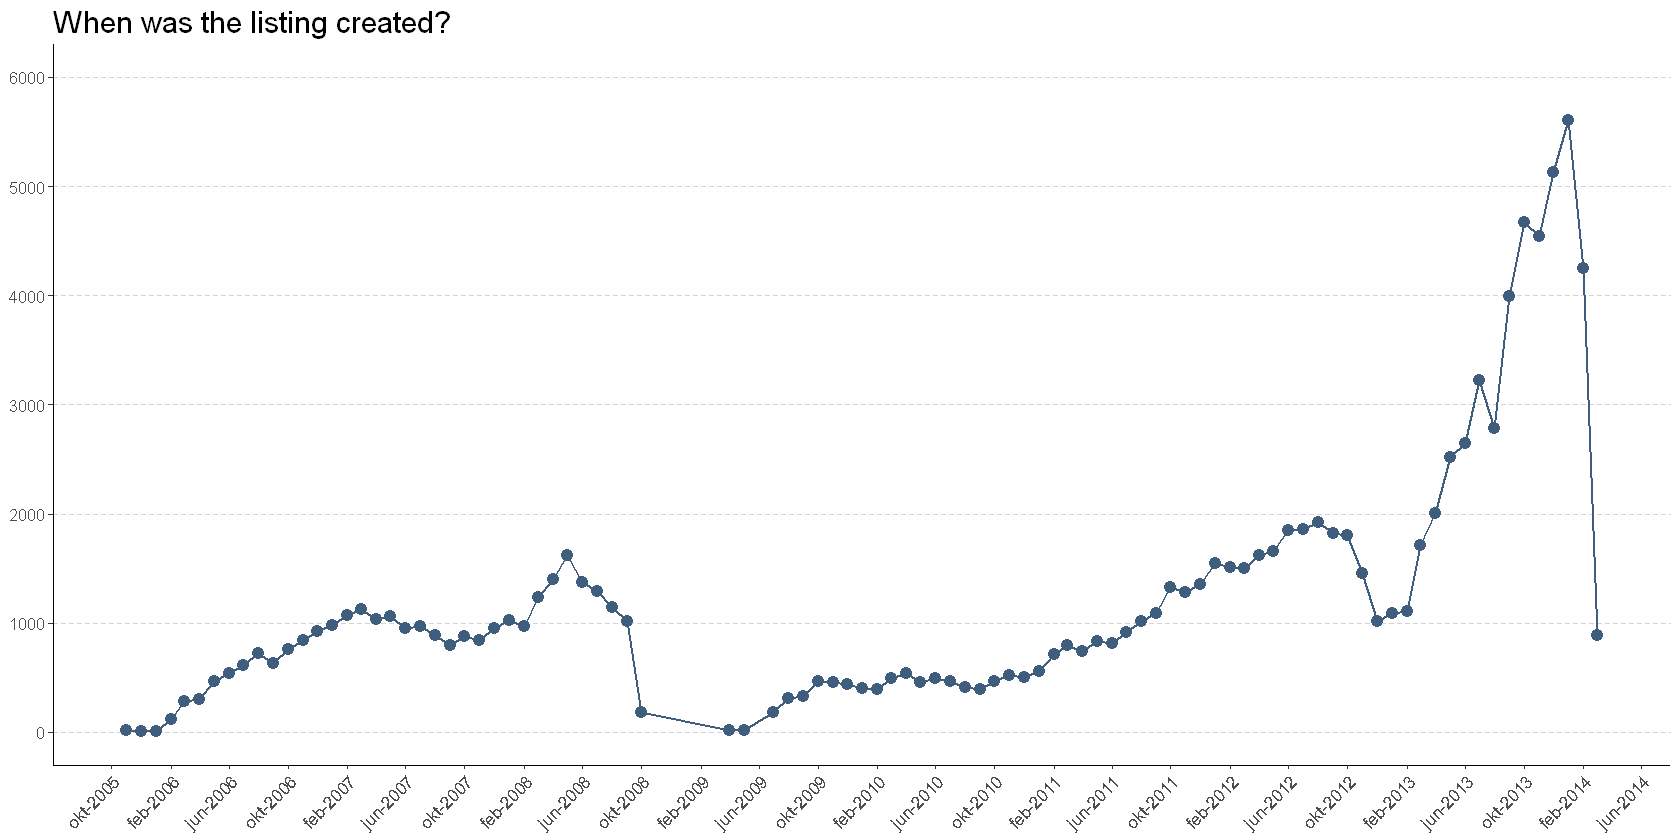

In [26]:
# Group Listings by year and month
creation_date <- df %>% count(df$ListingCreationDate) %>%
                setNames(.,c("date", "count")) %>%
                mutate(month = as.Date(cut(date, breaks = "month")))  %>%
                group_by(month) %>% 
                summarise(total = sum(count)) 

# Plot Listing Creation Date
ggplot(creation_date, aes(x=month, y=total)) +
      geom_line(color = "#3F5D7D", size = 0.75) + 
      geom_point(color = "#3F5D7D", size = 3) +
      scale_x_date(date_labels = "%b-%Y", date_breaks="4 months") +
      labs(title = "When was the listing created?") + 
      scale_y_continuous(limits = c(0,6000), breaks = seq(0, 6000, 1000)) +
      theme(plot.title = element_text(size = 18),
            axis.title.x = element_blank(),
            axis.title.y = element_blank(),
            axis.text.y = element_text(size=10),
            axis.text.x = element_text(angle = 45, hjust = 1, size=10),
            panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5))

In [27]:
# time range of dataset
range(df$ListingCreationDate)

[1] "2005-11-09" "2014-03-10"

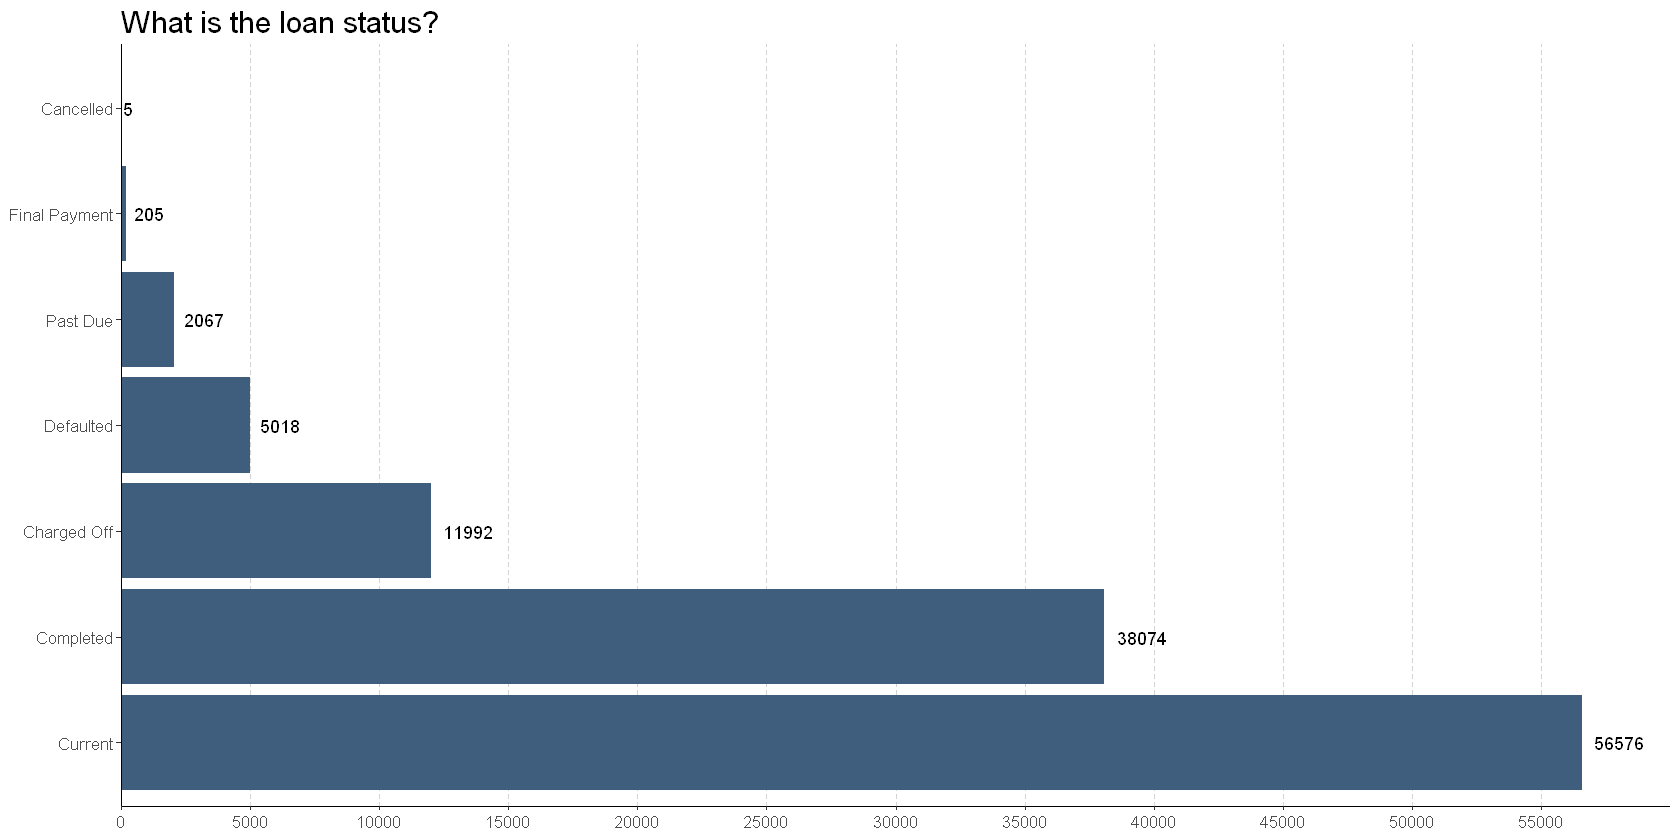

In [28]:
# Loan Status 
loan_status <- df %>% count(df$LoanStatus) %>%
                setNames(.,c("status", "count")) %>%
                arrange(desc(count))

# plot loan status
ggplot(loan_status, aes(x = status, y = count)) +
  geom_bar(fill = "#3F5D7D", stat = "identity") +
  geom_text(aes(label = count), hjust = -0.25) +
  labs(title = "What is the loan status?") + 
  scale_y_continuous(limits = c(0,60000), breaks = seq(0, 55000, 5000), expand = c(0,0)) +
  theme(plot.title = element_text(size = 18),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(size=10),
        panel.grid.major.x = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  rotate()

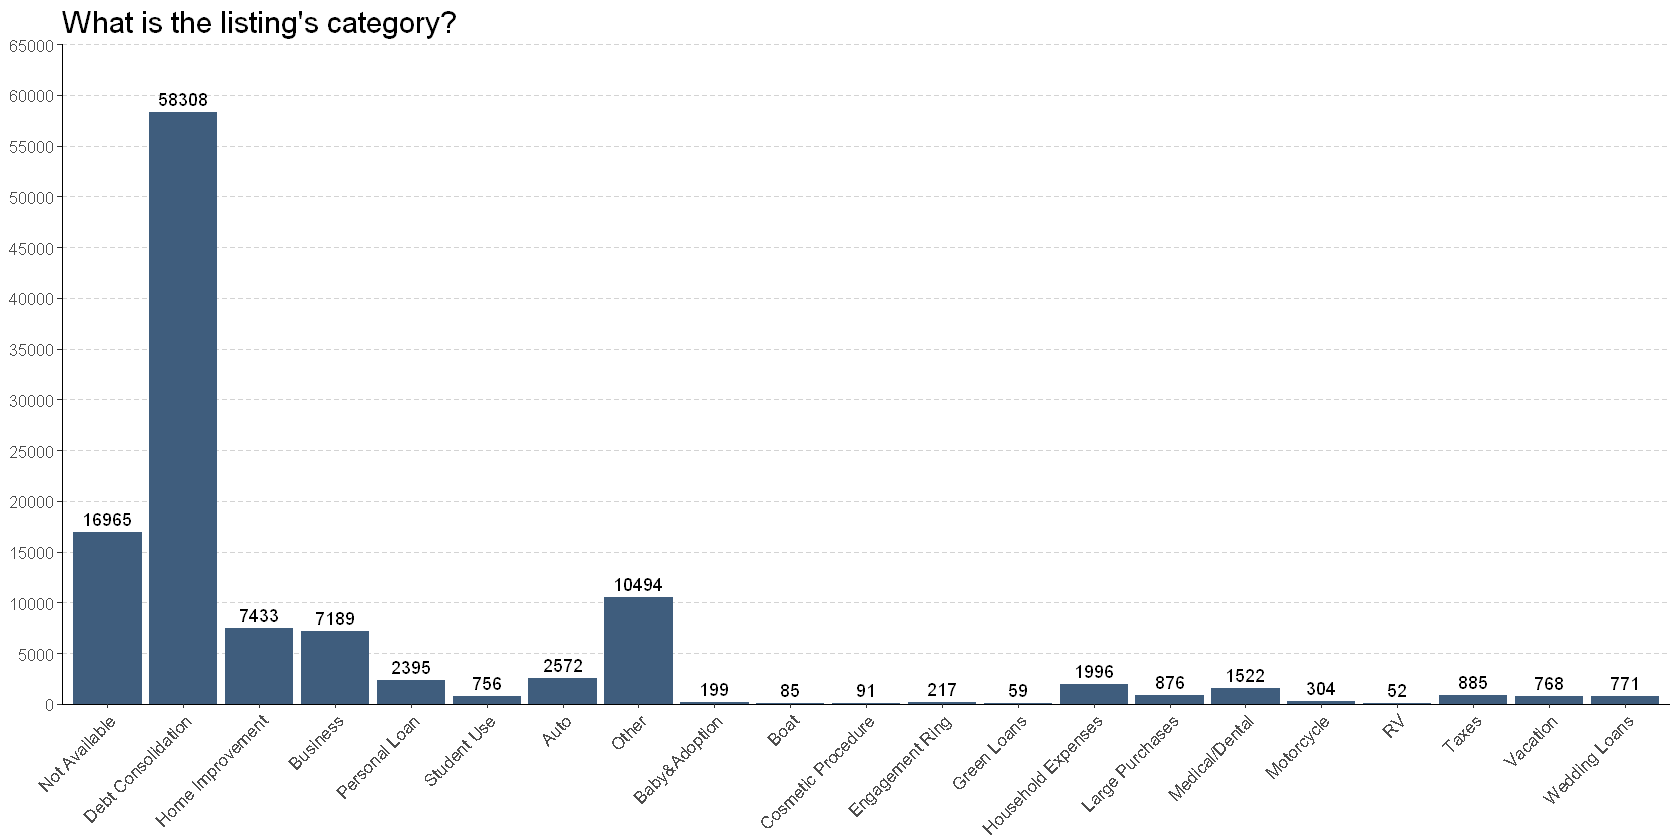

In [29]:
# Listing Category
listing_category <- df %>% count(df$ListingCategory) %>%
                    setNames(.,c("category", "count"))

# plot listing category
ggplot(listing_category, aes(x = category, y = count)) +
  geom_bar(fill = "#3F5D7D", stat = "identity") +
  geom_text(aes(label = count), vjust = -0.5) +
  labs(title = "What is the listing's category?") + 
  scale_y_continuous(limits = c(0,65000), breaks = seq(0, 65000, 5000), expand = c(0,0)) +
  theme(plot.title = element_text(size = 18),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5))

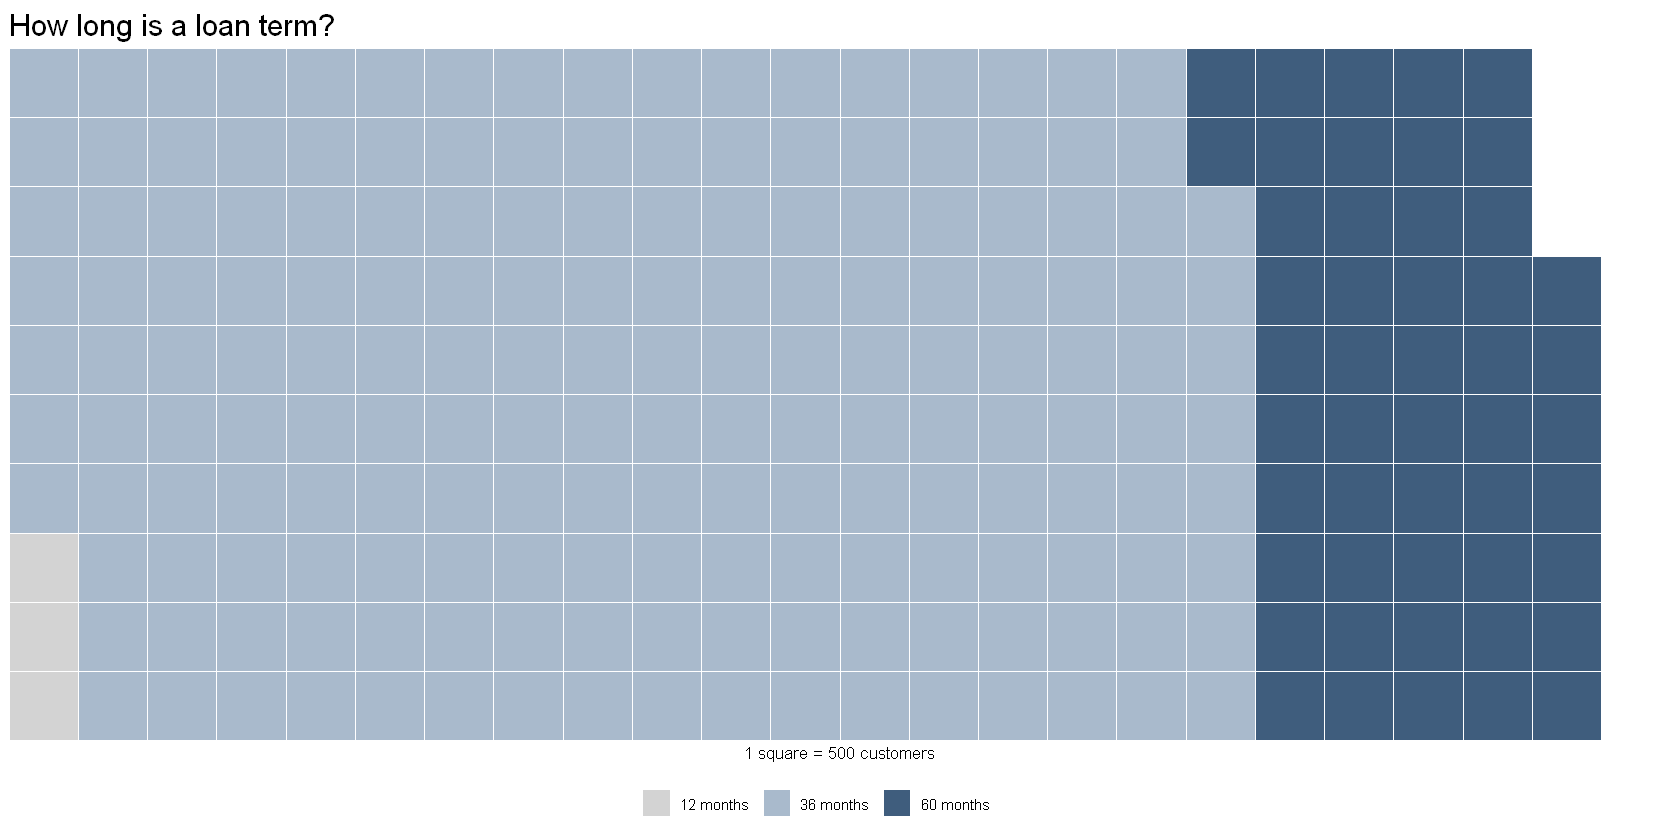

In [30]:
# Term
term <- df %>% count(df$Term) %>%
                    setNames(.,c("term", "count"))

# plot home ownership
waffle(c("12 months" = term$count[term$term == 12] / 500, 
         "36 months" = term$count[term$term == 36] / 500,
         "60 months" = term$count[term$term == 60] / 500),
       rows = 10, 
       colors = c("#d3d3d3", "#a9bacc", "#3F5D7D"), 
       size = 0.5, 
       pad = 1, 
       legend_pos = "bottom", 
       title = "How long is a loan term?",
       xlab = "1 square = 500 customers")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1340  0.1840  0.1928  0.2500  0.4975 

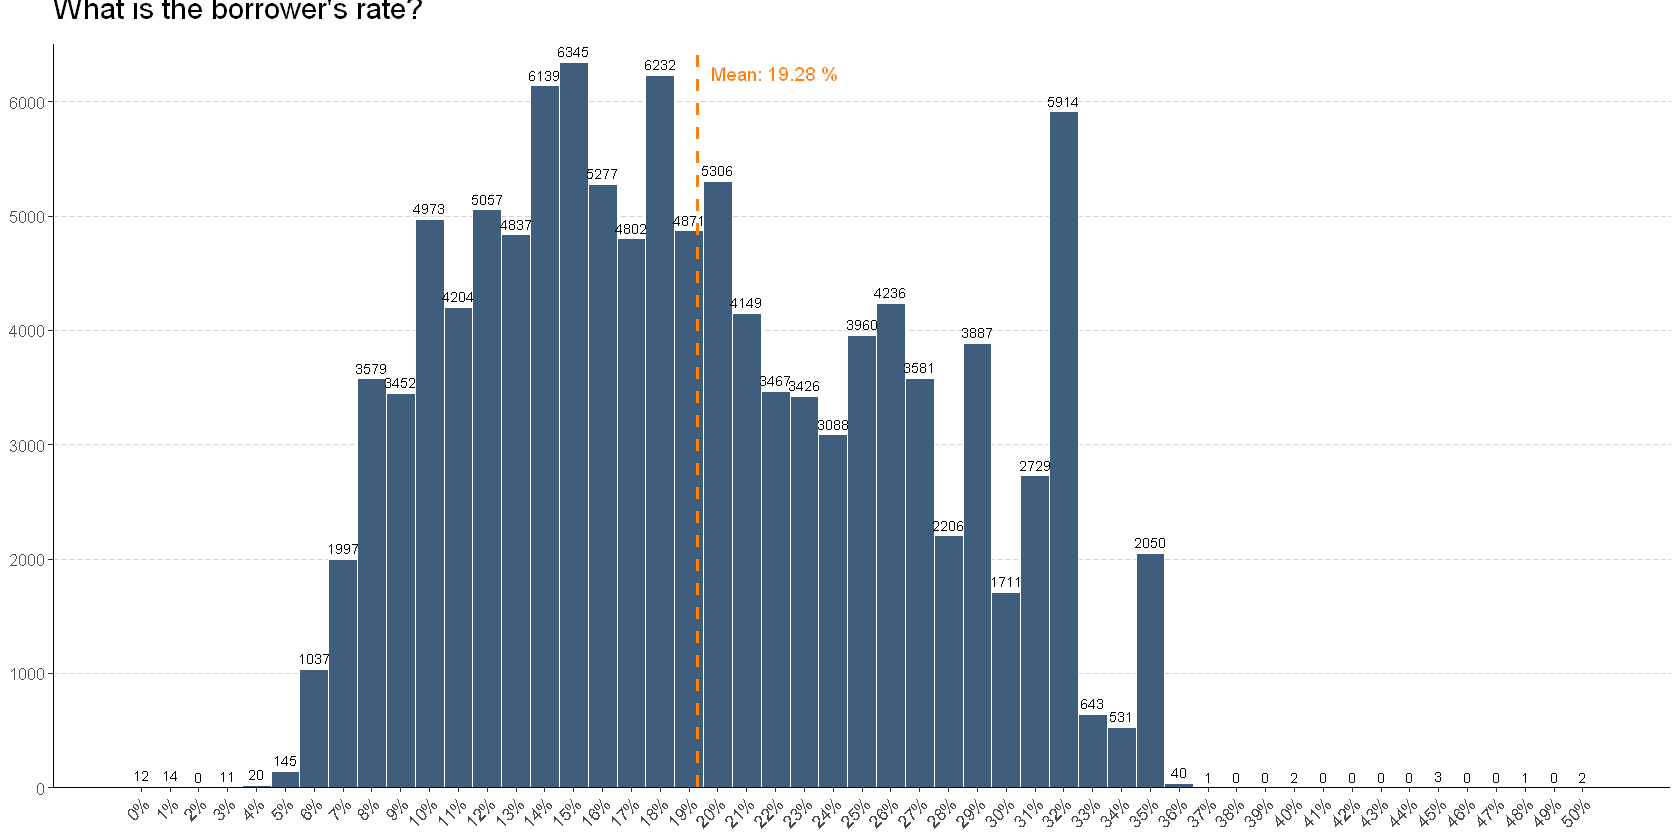

In [31]:
# Borrower Rate
summary(df$BorrowerRate)
        
borrower_rate <- df %>% count(df$BorrowerRate) %>%
                    set_colnames(c("rate", "count"))

ggplot(aes(x = BorrowerRate * 100), data = df) +
  geom_histogram(binwidth = 1, color = "#ffffff", fill = "#3F5D7D") +
  stat_bin(binwidth = 1, aes(y=..count.., label=..count..,), geom="text", vjust=-.5, size=3) +
  scale_x_continuous(breaks = seq(0, 50, 1), labels=dollar_format(prefix="", suffix="%")) +
  scale_y_continuous(limits = c(0,6500), breaks = seq(0, 6500, 1000), expand = c(0,0)) +
  labs(title="What is the borrower's rate?") + 
  theme(plot.title = element_text(size = 18, vjust = 5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  geom_vline(aes(xintercept = mean(BorrowerRate) * 100),
            color = "#ff7f0e", linetype = "dashed", size = 1) + 
  annotate("text", x = 22, y = 6250, 
           label = paste("Mean:", round(mean(df$BorrowerRate * 100),2), "%"), size = 4, color = "#ff7f0e")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1000    4000    6500    8337   12000   35000 

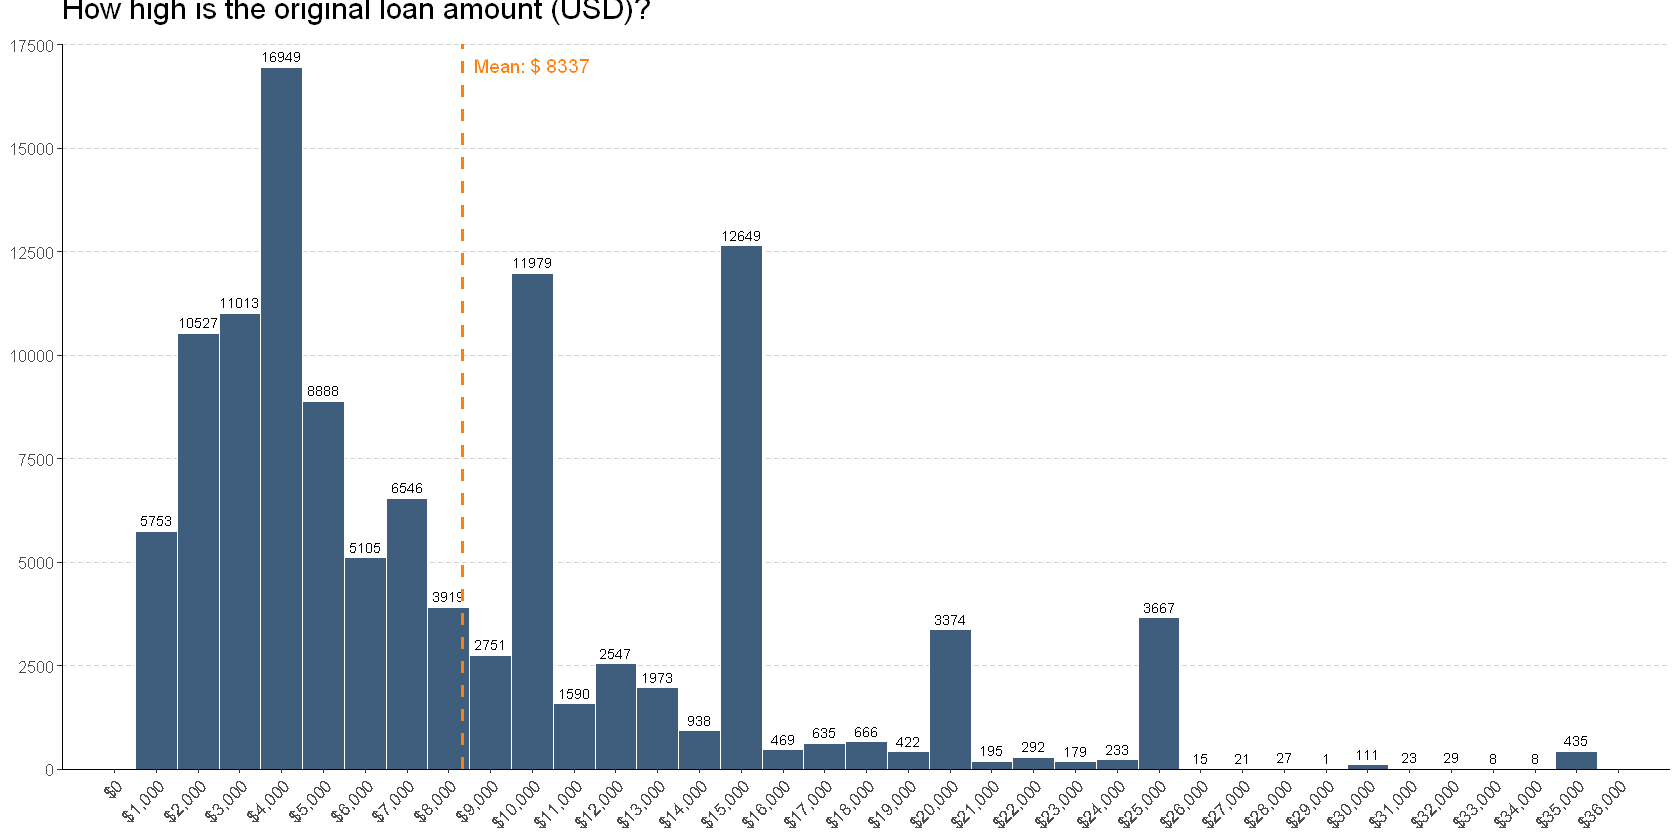

In [32]:
# Loan Original Amount statistics
summary(df$LoanOriginalAmount)

# plot Loan Original Amount
ggplot(aes(x = LoanOriginalAmount), data = df) +
  geom_histogram(binwidth = 1000, color = "#ffffff", fill = "#3F5D7D") +
  stat_bin(binwidth = 1000, aes(y=..count.., label=..count..,), geom="text", vjust=-.5, size=3) +
  scale_x_continuous(breaks = seq(0, 36000, 1000), labels=dollar_format(prefix="$")) +
  scale_y_continuous(limits = c(0,17500), breaks = seq(0, 17500, 2500), expand = c(0,0)) +
  labs(title="How high is the original loan amount (USD)?") + 
  theme(plot.title = element_text(size = 18, vjust = 5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  geom_vline(aes(xintercept = mean(LoanOriginalAmount)),
            color = "#ff7f0e", linetype = "dashed", size = 1) + 
  annotate("text", x = 10000, y = 17000, 
           label = paste("Mean: $", round(mean(df$LoanOriginalAmount))), size = 4, color = "#ff7f0e")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   131.6   217.7   272.5   371.6  2251.5 

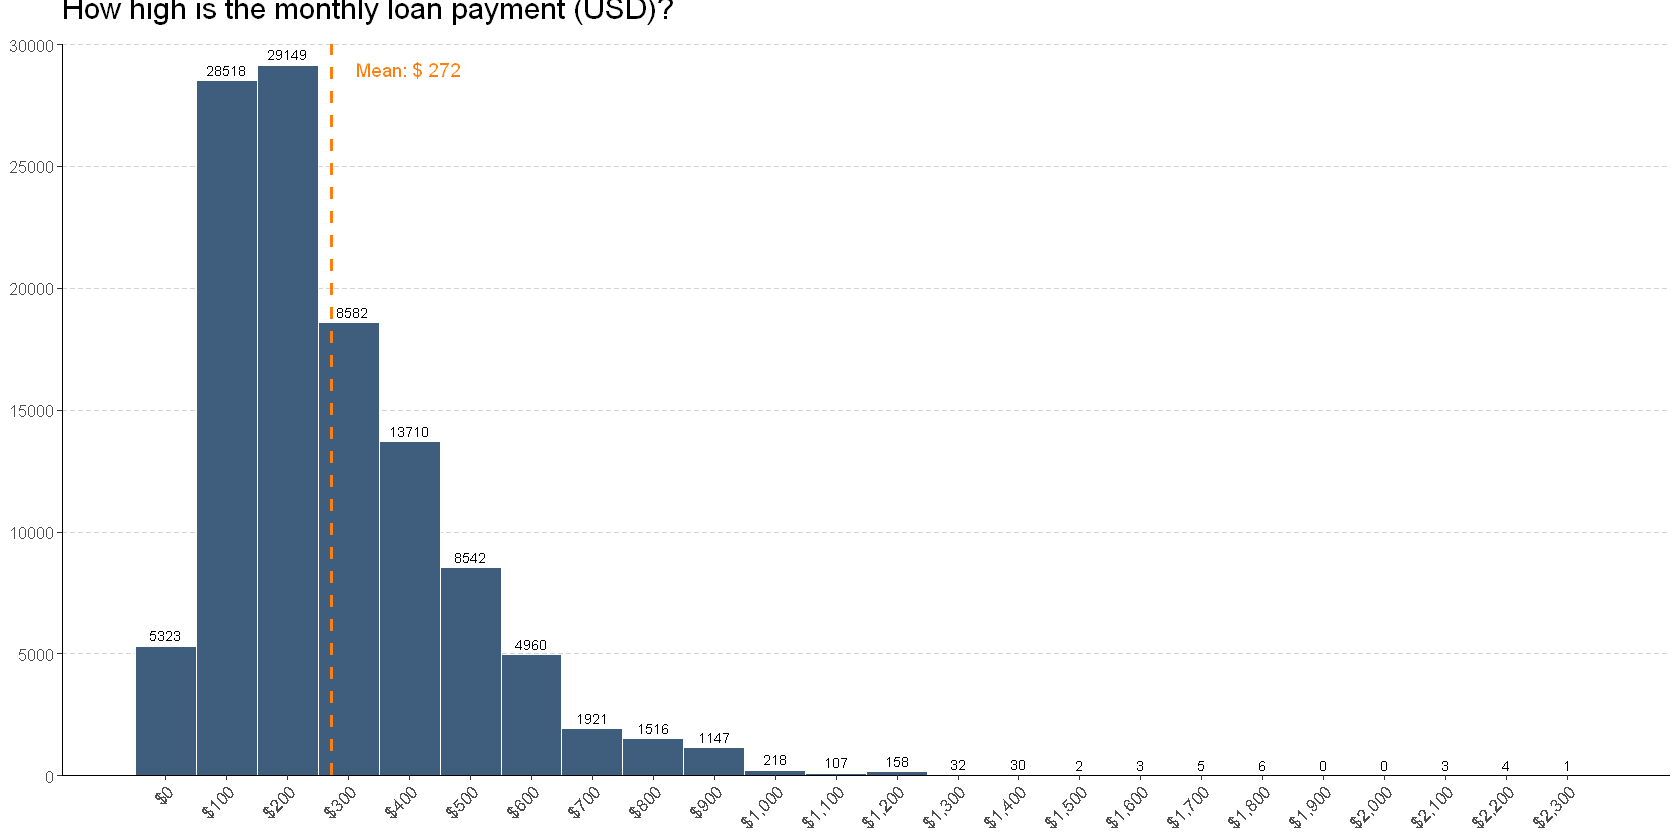

In [33]:
# Monthly Loan Payment statistics
summary(df$MonthlyLoanPayment)

# plot Monthly Loan Payment 
ggplot(aes(x = MonthlyLoanPayment), data = df) +
  geom_histogram(binwidth = 100, color = "#ffffff", fill = "#3F5D7D") +
  stat_bin(binwidth = 100, aes(y=..count.., label=..count..,), geom="text", vjust=-.5, size=3) +
  scale_x_continuous(breaks = seq(0, 2300, 100), labels=dollar_format(prefix="$")) +
  scale_y_continuous(limits = c(0,30000), breaks = seq(0, 30000, 5000), expand = c(0,0)) +
  labs(title="How high is the monthly loan payment (USD)?") + 
  theme(plot.title = element_text(size = 18, vjust = 5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  geom_vline(aes(xintercept = mean(MonthlyLoanPayment)),
            color = "#ff7f0e", linetype = "dashed", size = 1) + 
  annotate("text", x = 400, y = 29000, 
           label = paste("Mean: $", round(mean(df$MonthlyLoanPayment))), size = 4, color = "#ff7f0e")

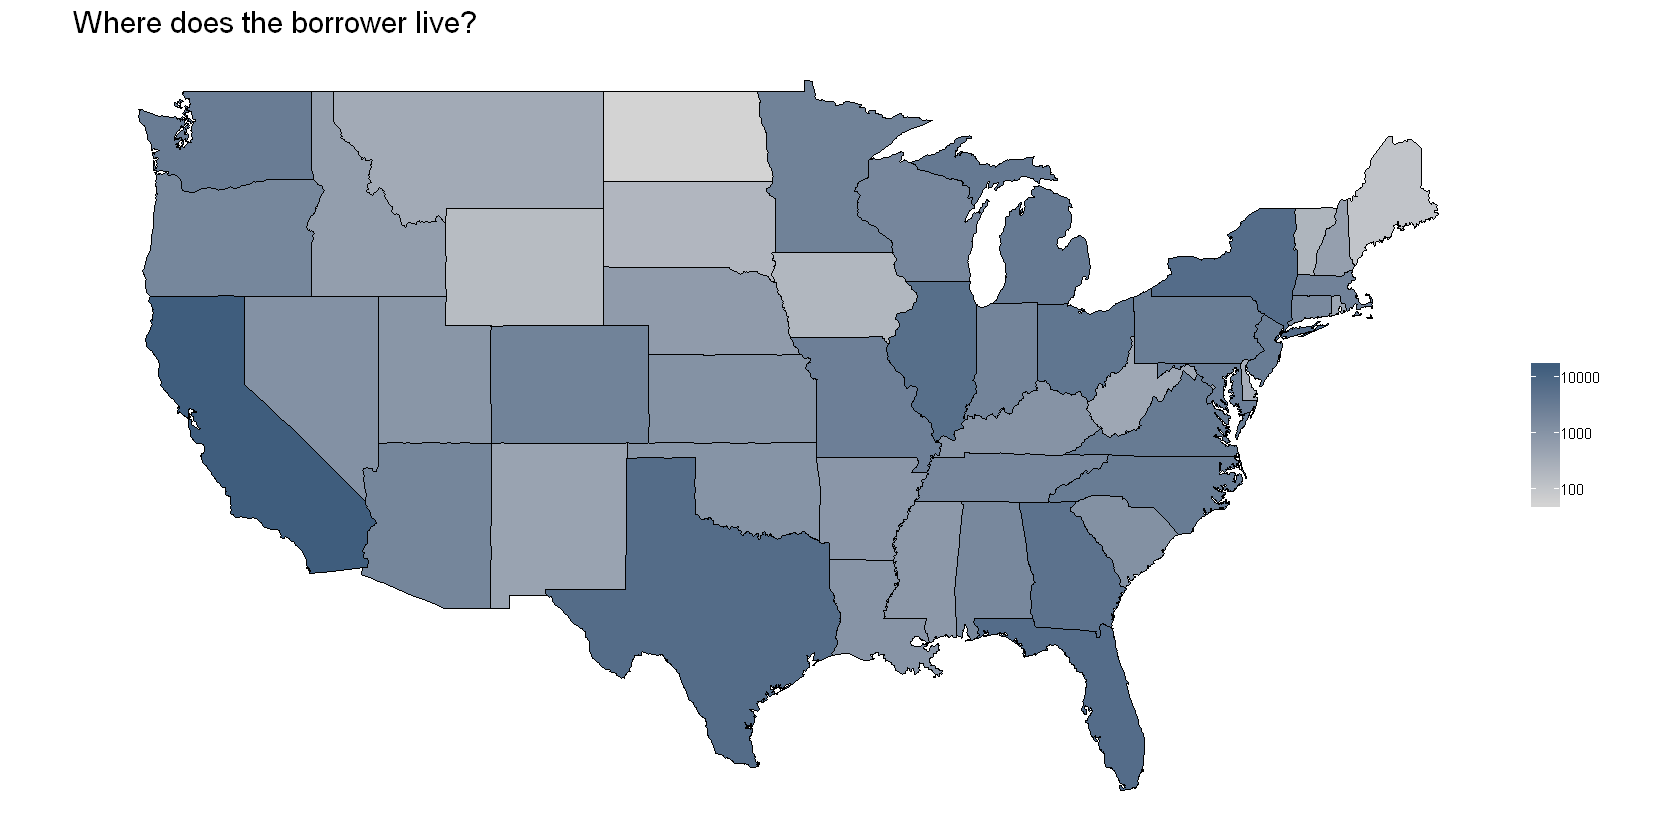

In [34]:
# group loans by borrower's state
loans <- df %>% count(df$BorrowerState) %>%
                setNames(.,c("region", "count"))
loans$region <- tolower(loans$region)

# get polygon data for states
states <- map_data("state")

# merge datasets
loans_states <- inner_join(states, loans, by = "region")

# plot borrowers by state
ggplot(data = loans_states, mapping = aes(x = long, y = lat, group = group)) + 
  coord_fixed(1.3) + 
  geom_polygon(color = "#000000", fill = "#d3d3d3") + 
  geom_polygon(data = loans_states, aes(fill = count), color = "#ffffff") +
  geom_polygon(color = "#000000", fill = NA) +
  labs(title = "Where does the borrower live?") + 
  theme_bw() +
  theme(plot.title = element_text(size = 18),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        legend.title = element_blank(),
        panel.border = element_blank(),
        panel.grid = element_blank()) + 
  scale_fill_gradient(trans = "log10", low = "#d3d3d3", high = "#3F5D7D")

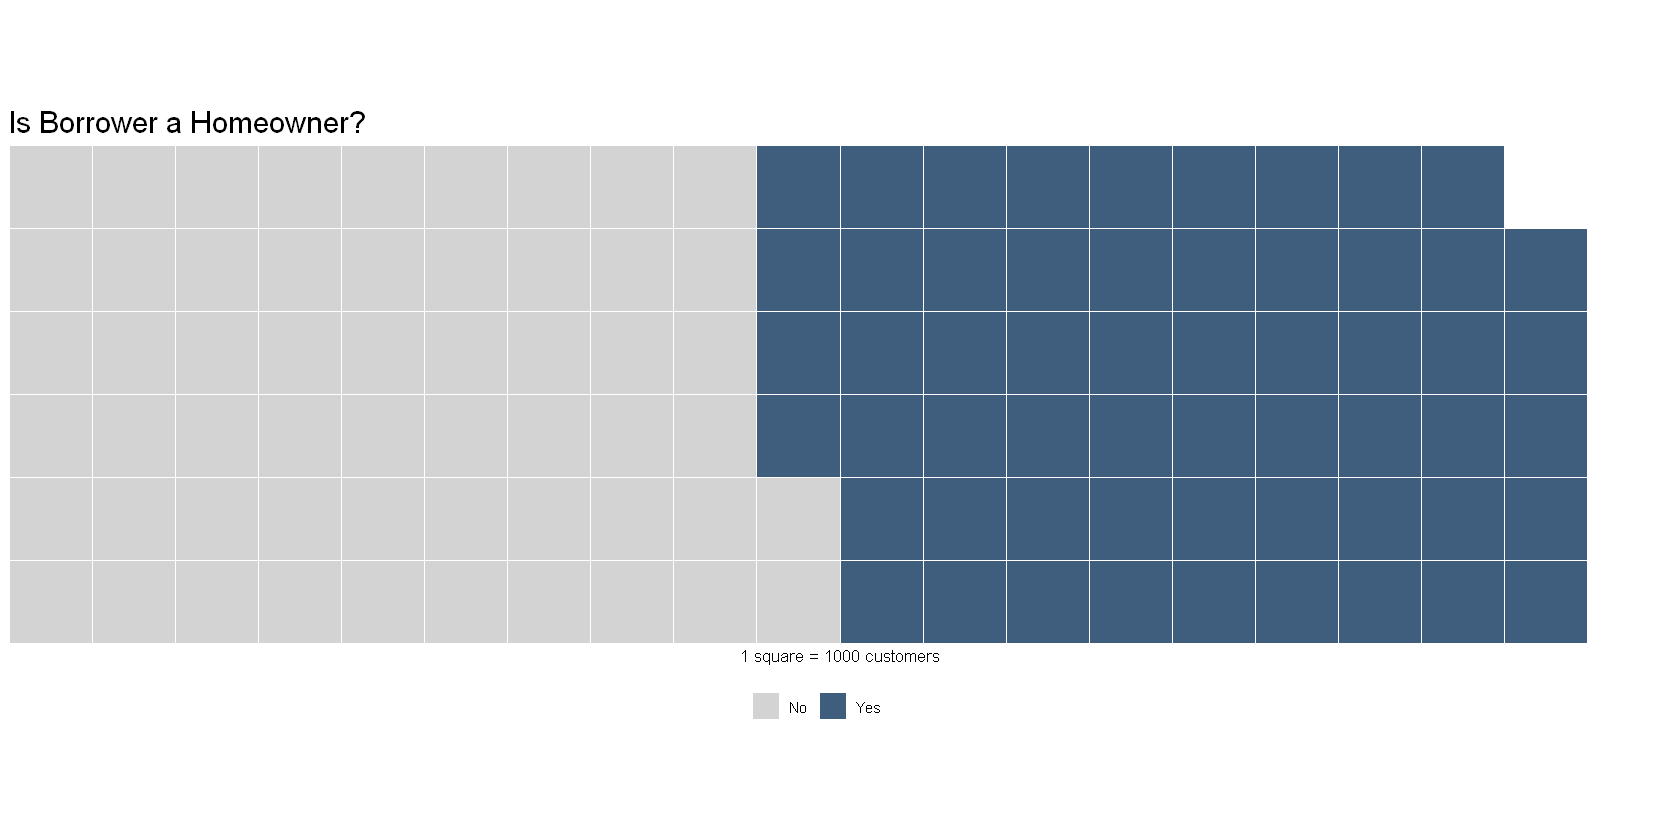

In [35]:
# IsBorrowerHomeowner variable
homeowner <- df %>% count(df$IsBorrowerHomeowner) %>%
                setNames(.,c("owner", "count"))

# plot home ownership
waffle(c(No = homeowner$count[homeowner$owner == "FALSE"] / 1000, 
         Yes = homeowner$count[homeowner$owner == "TRUE"] / 1000), 
       rows = 6, 
       colors = c("#d3d3d3","#3F5D7D"), 
       size = 0.5, pad = 1, 
       legend_pos = "bottom", 
       title = "Is Borrower a Homeowner?",
       xlab = "1 square = 1000 customers")

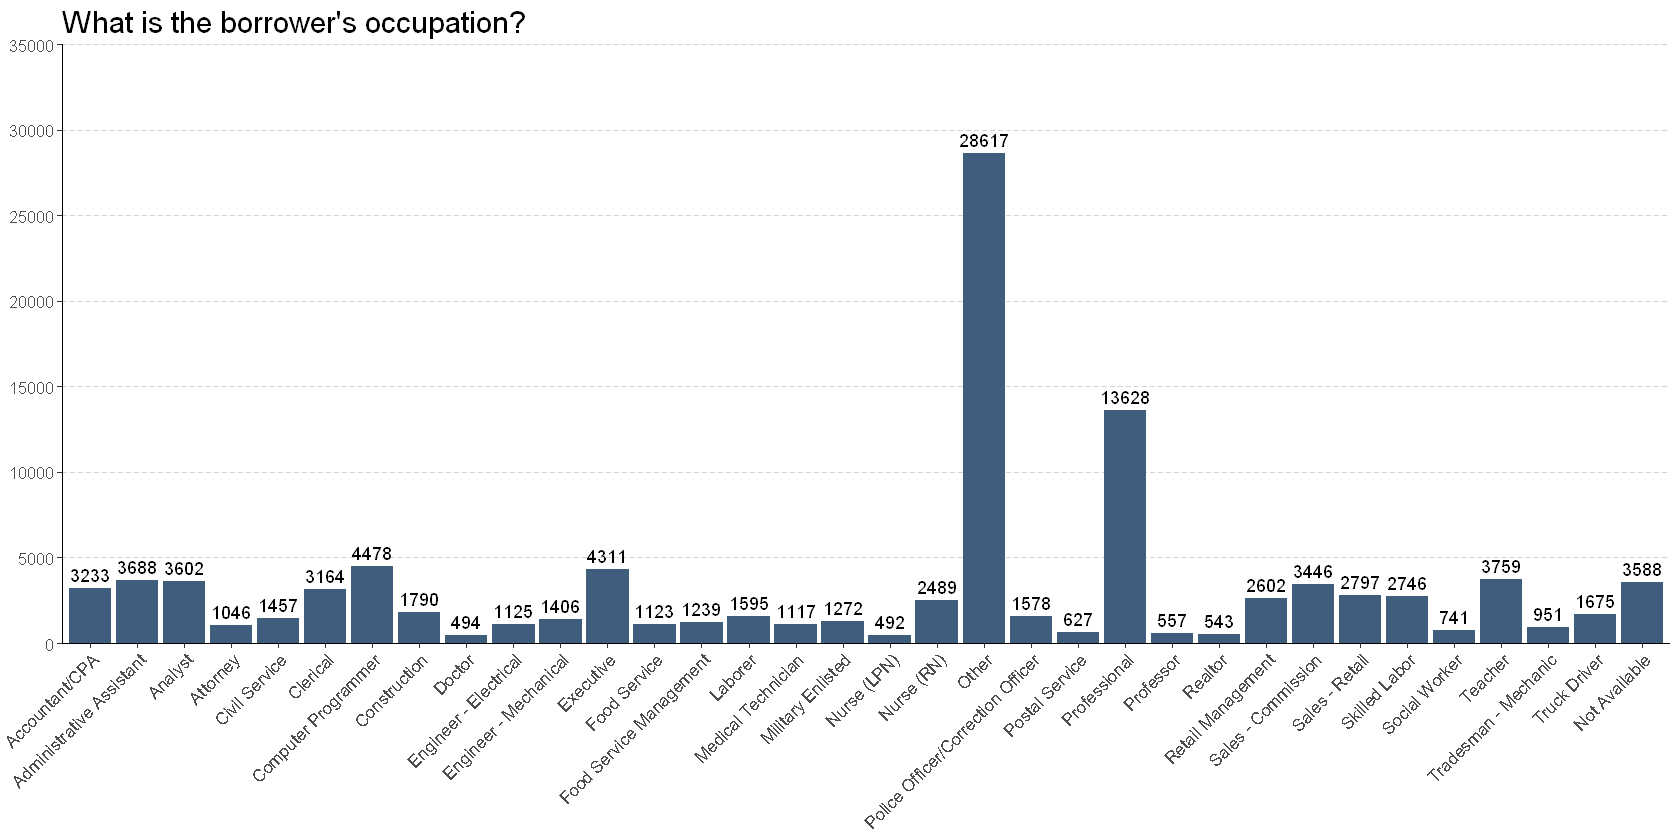

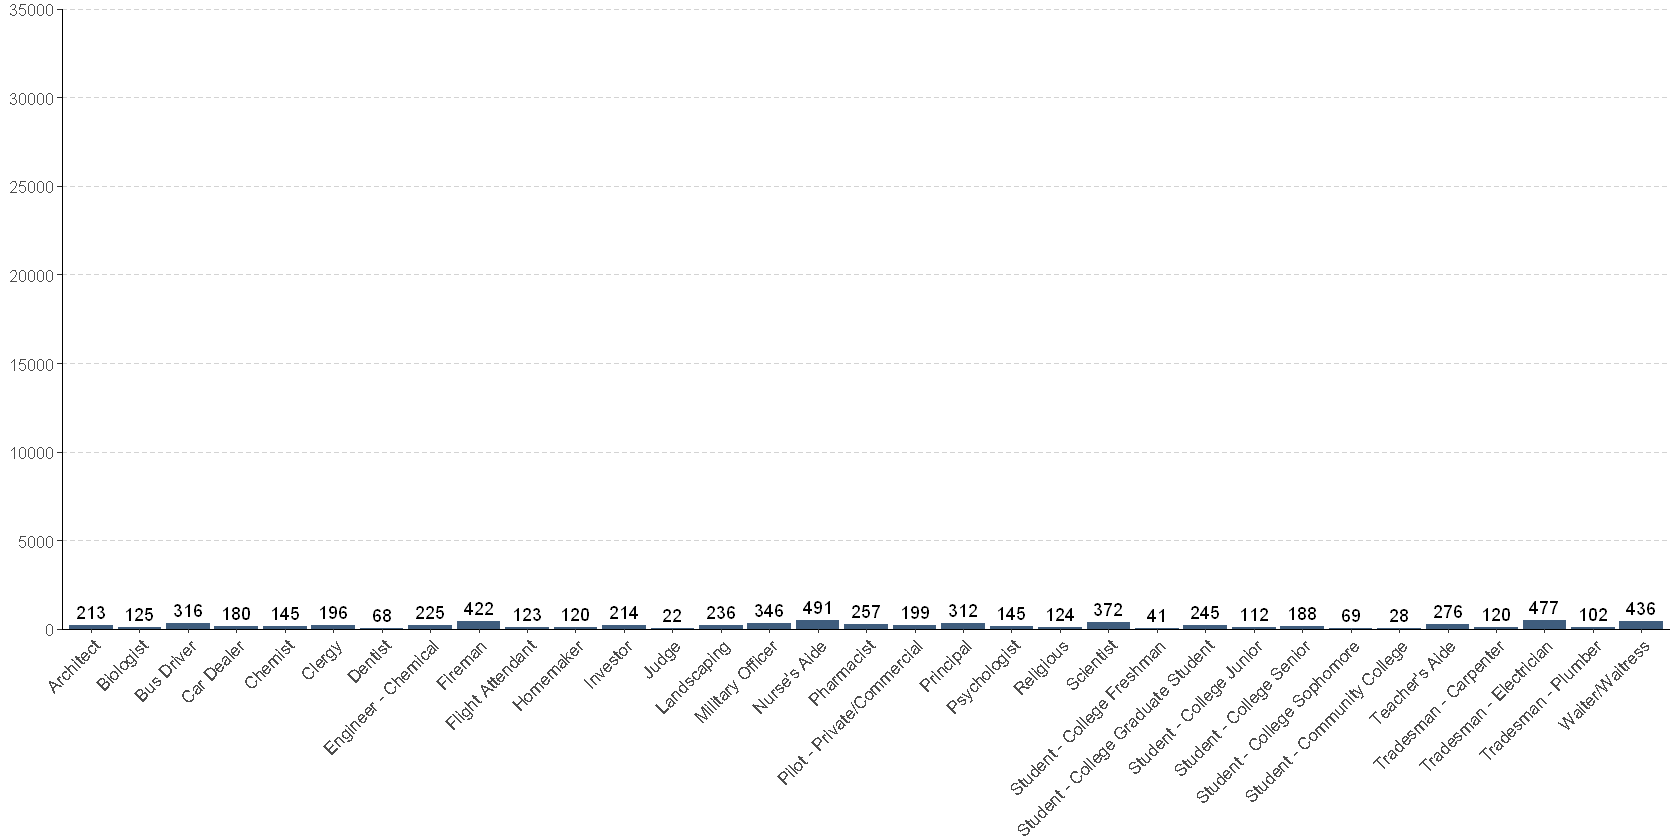

In [36]:
# Occupation
occupation <- df %>% count(df$Occupation) %>%
                    setNames(.,c("occupation", "count")) %>%
                    arrange(desc(count))

# plot occupation
ggplot(occupation[1:34,], aes(x = occupation, y = count)) +
  geom_bar(fill = "#3F5D7D", stat = "identity") +
  geom_text(aes(label = count), vjust = -0.5) +
  labs(title = "What is the borrower's occupation?") + 
  scale_y_continuous(limits = c(0,35000), breaks = seq(0, 35000, 5000), expand = c(0,0)) +
  theme(plot.title = element_text(size = 18),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5))

ggplot(occupation[35:67,], aes(x = occupation, y = count)) +
  geom_bar(fill = "#3F5D7D", stat = "identity") +
  geom_text(aes(label = count), vjust = -0.5) +
  scale_y_continuous(limits = c(0,35000), breaks = seq(0, 35000, 5000), expand = c(0,0)) +
  theme(plot.title = element_text(hjust = 0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5))

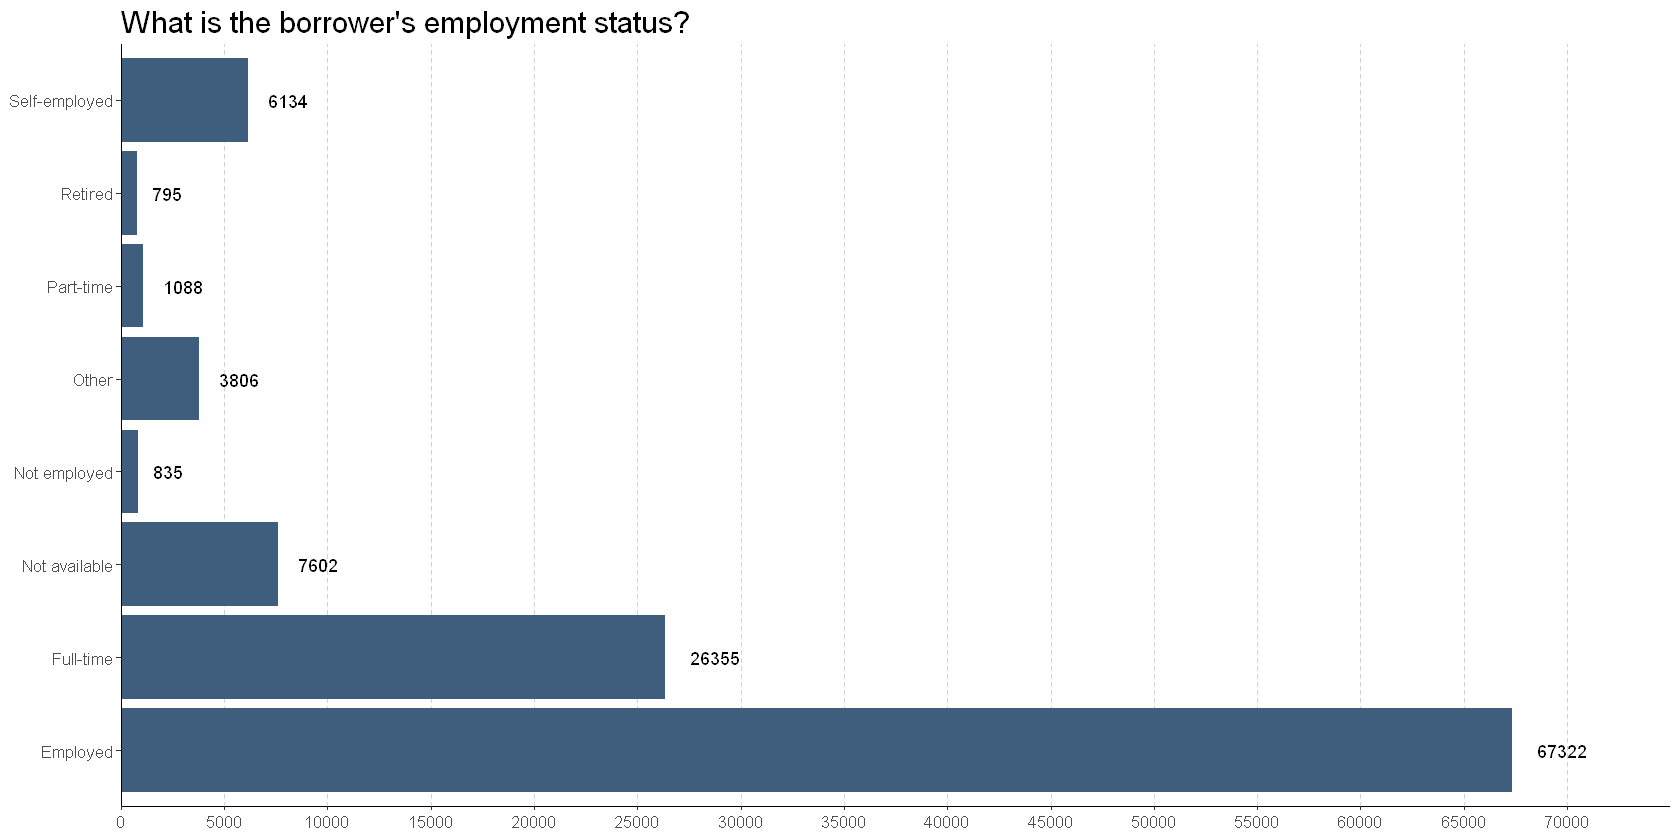

In [37]:
# Employment Status
employment <- df %>% count(df$EmploymentStatus) %>%
                    setNames(.,c("employment", "count")) %>%
                    arrange(desc(count))

# plot Employment Status
ggplot(employment, aes(x = employment, y = count)) +
  geom_bar(fill = "#3F5D7D", stat = "identity") +
  geom_text(aes(label = count), hjust = -0.5) +
  labs(title = "What is the borrower's employment status?") + 
  scale_y_continuous(limits = c(0,75000), breaks = seq(0, 70000, 5000), expand = c(0,0)) +
  theme(plot.title = element_text(size = 18),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(size=10),
        panel.grid.major.x = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) +
  rotate()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    3200    4667    5608    6825 1750003 

Warning message:
"Removed 1140 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1140 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."Warning message:
"Removed 2 rows containing missing values (geom_text)."

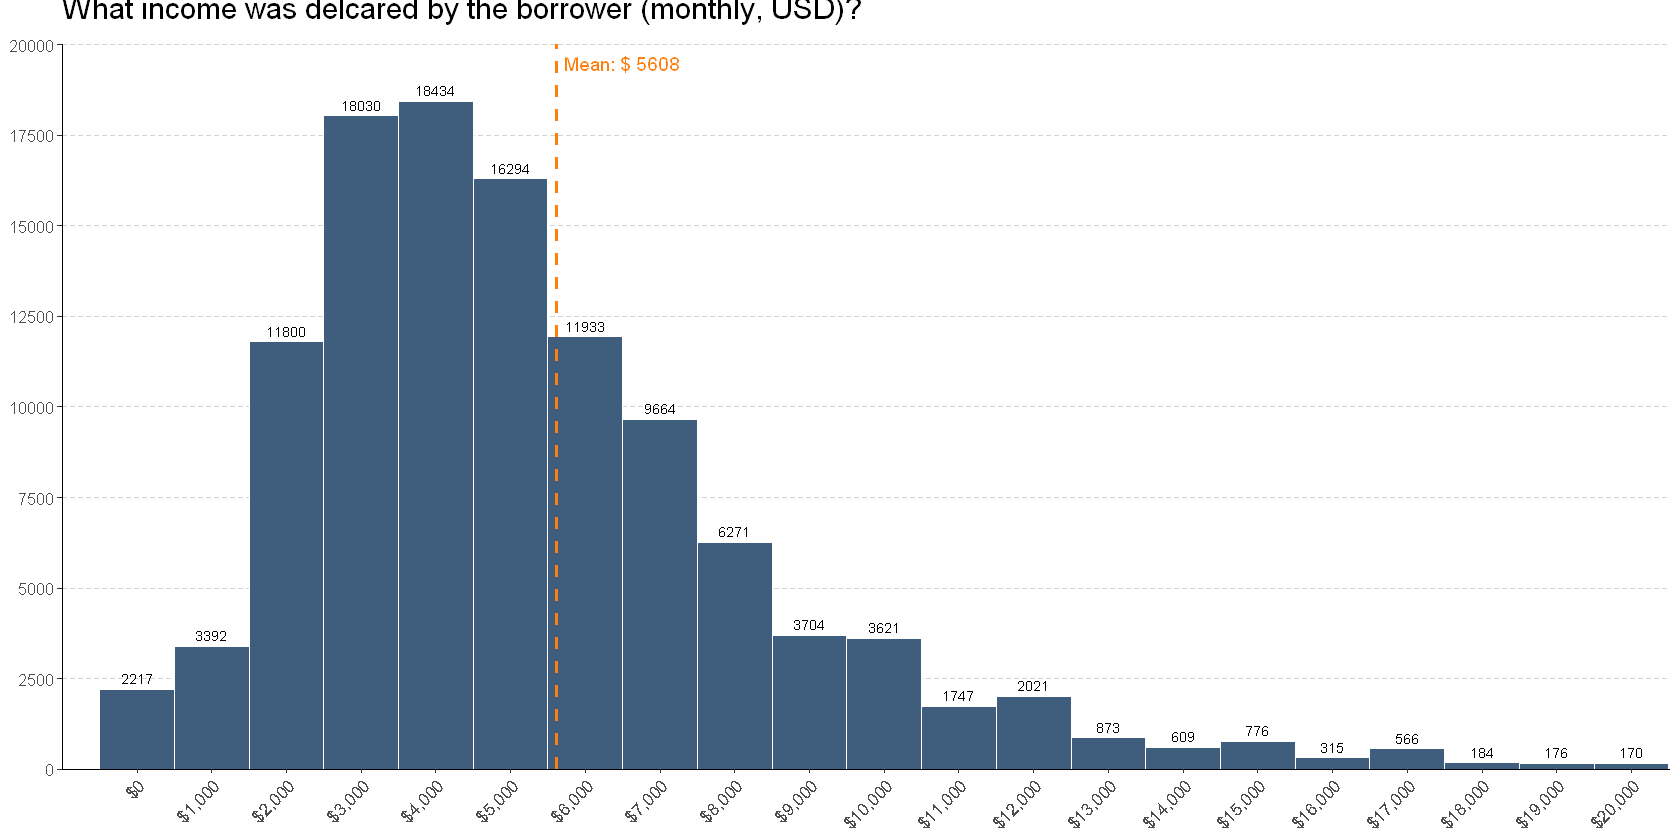

In [38]:
# Stated Monthly Income
summary(df$StatedMonthlyIncome)

# plot Stated Monthly Income
ggplot(aes(x = StatedMonthlyIncome), data = df) +
  geom_histogram(binwidth = 1000, color = "#ffffff", fill = "#3F5D7D") +
  stat_bin(binwidth = 1000, aes(y=..count.., label=..count..,), geom="text", vjust=-.5, size=3) +
  scale_x_continuous(limits = c(-999, quantile(df$StatedMonthlyIncome, 0.99)), 
                     breaks = seq(0, 20000, 1000),
                     expand = c(0,0),
                     labels=dollar_format(prefix="$")) +
  scale_y_continuous(limits = c(0,20000), 
                     breaks = seq(0, 20000, 2500), 
                     expand = c(0,0)) +
  labs(title="What income was delcared by the borrower (monthly, USD)?") + 
  theme(plot.title = element_text(size = 18, vjust = 5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  geom_vline(aes(xintercept = mean(StatedMonthlyIncome)),
            color = "#ff7f0e", linetype = "dashed", size = 1) + 
  annotate("text", x = 6500, y = 19500, 
           label = paste("Mean: $", round(mean(df$StatedMonthlyIncome))), size = 4, color = "#ff7f0e")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1300  0.2100  0.2552  0.3100 10.0100 

Warning message:
"Removed 1130 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1130 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."Warning message:
"Removed 2 rows containing missing values (geom_text)."

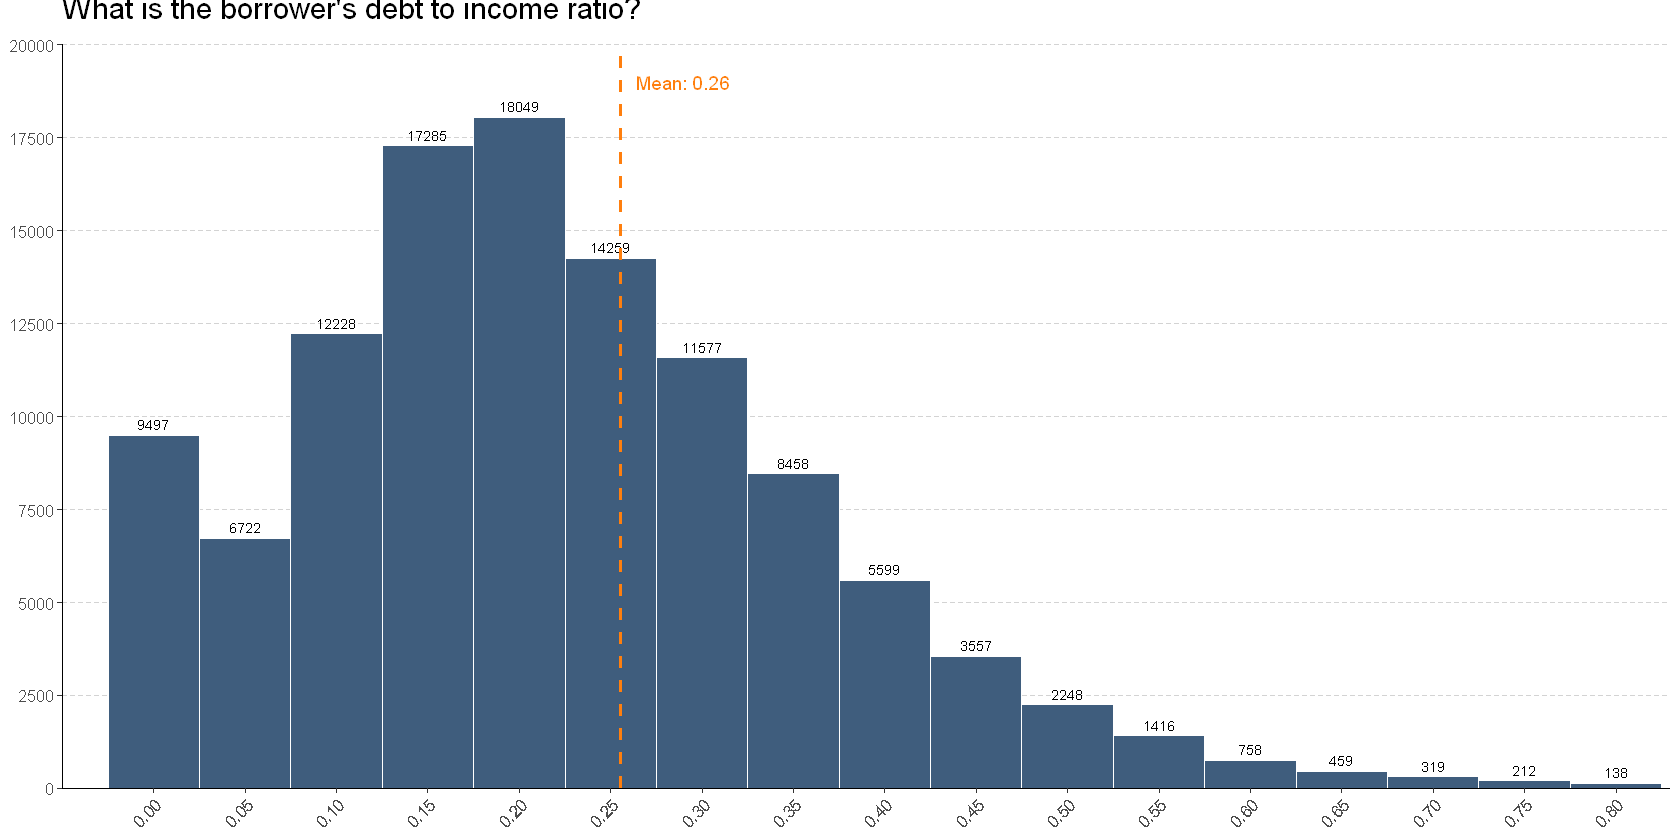

In [39]:
# Debt To Income Ratio
summary(df$DebtToIncomeRatio)

# plot debt to income ratio
ggplot(aes(x = DebtToIncomeRatio), data = df) +
  geom_histogram(binwidth = 0.05, color = "#ffffff", fill = "#3F5D7D") +
  stat_bin(binwidth = 0.05, aes(y=..count.., label=..count..,), geom="text", vjust=-.5, size=3) +
  scale_x_continuous(limits = c(-0.05, quantile(df$DebtToIncomeRatio, 0.99)), breaks = seq(0, 2, 0.05), expand = c(0,0)) +
  scale_y_continuous(limits = c(0,20000), breaks = seq(0, 20000, 2500), expand = c(0,0)) +
  labs(title="What is the borrower's debt to income ratio?") + 
  theme(plot.title = element_text(size = 18, vjust = 5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  geom_vline(aes(xintercept = mean(DebtToIncomeRatio)),
            color = "#ff7f0e", linetype = "dashed", size = 1) + 
  annotate("text", x = 0.29, y = 19000, 
           label = paste("Mean:", round(mean(df$DebtToIncomeRatio),2)), size = 4, color = "#ff7f0e")

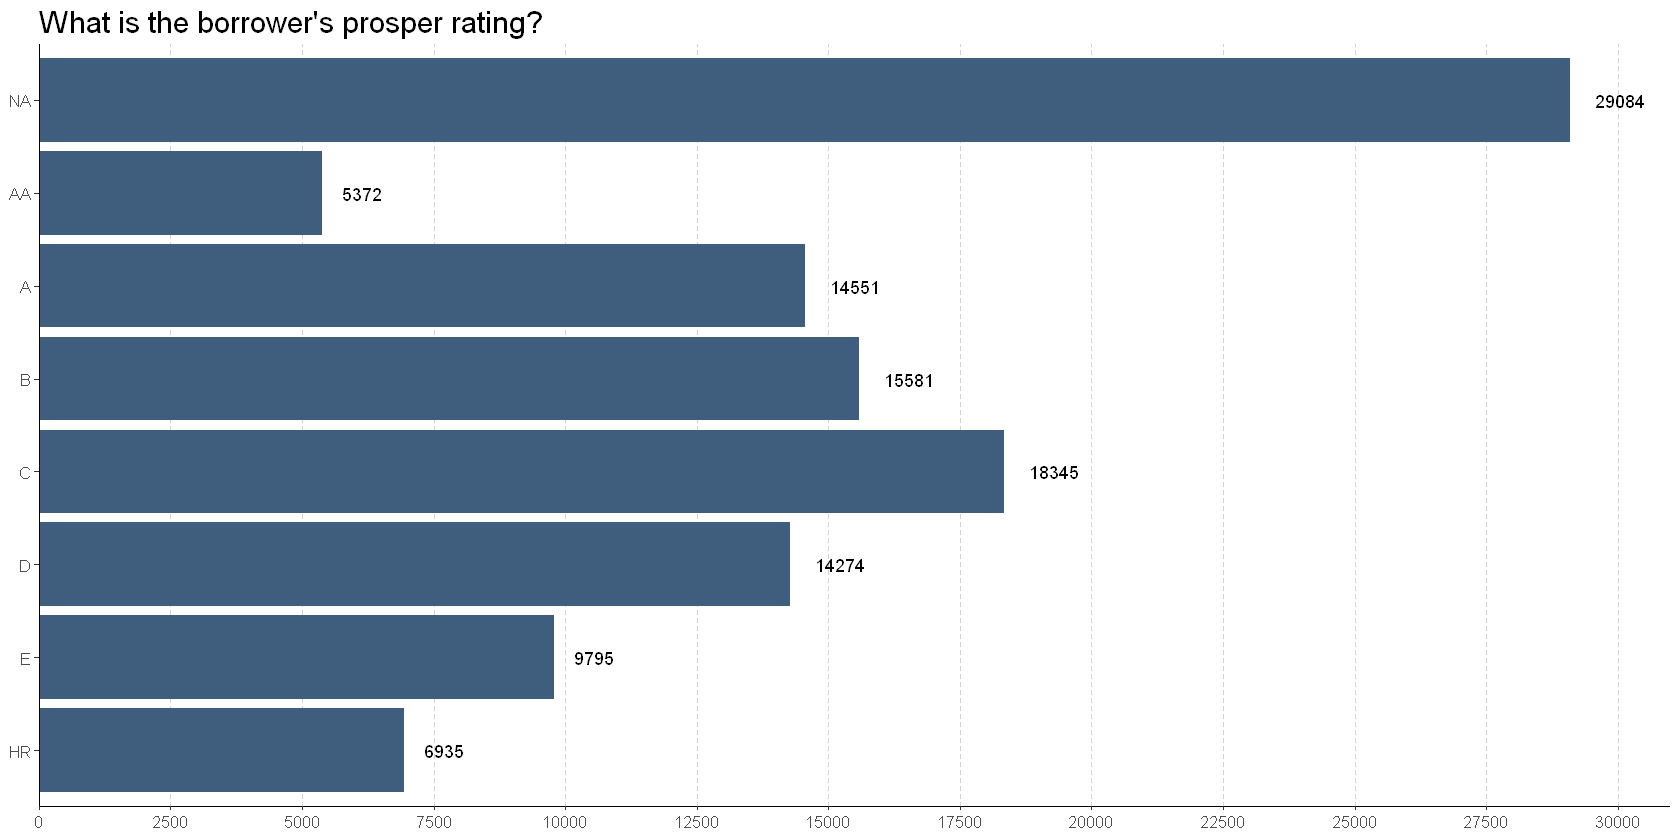

In [40]:
# Prosper Rating
prosper_rating <- df %>% count(df$ProsperRating..Alpha.) %>%
                    setNames(.,c("rating", "count")) %>%
                    arrange(desc(count))

# Prosper Rating
ggplot(prosper_rating, aes(x = rating, y = count)) +
  geom_bar(fill = "#3F5D7D", stat = "identity") +
  geom_text(aes(label = count), hjust = -0.5) +
  labs(title = "What is the borrower's prosper rating?") + 
  scale_y_continuous(limits = c(0,31000), breaks = seq(0, 31000, 2500), expand = c(0,0)) +
  theme(plot.title = element_text(size = 18),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(size=10),
        panel.grid.major.x = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) +
  rotate()

Warning message:
"Removed 1112 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1112 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

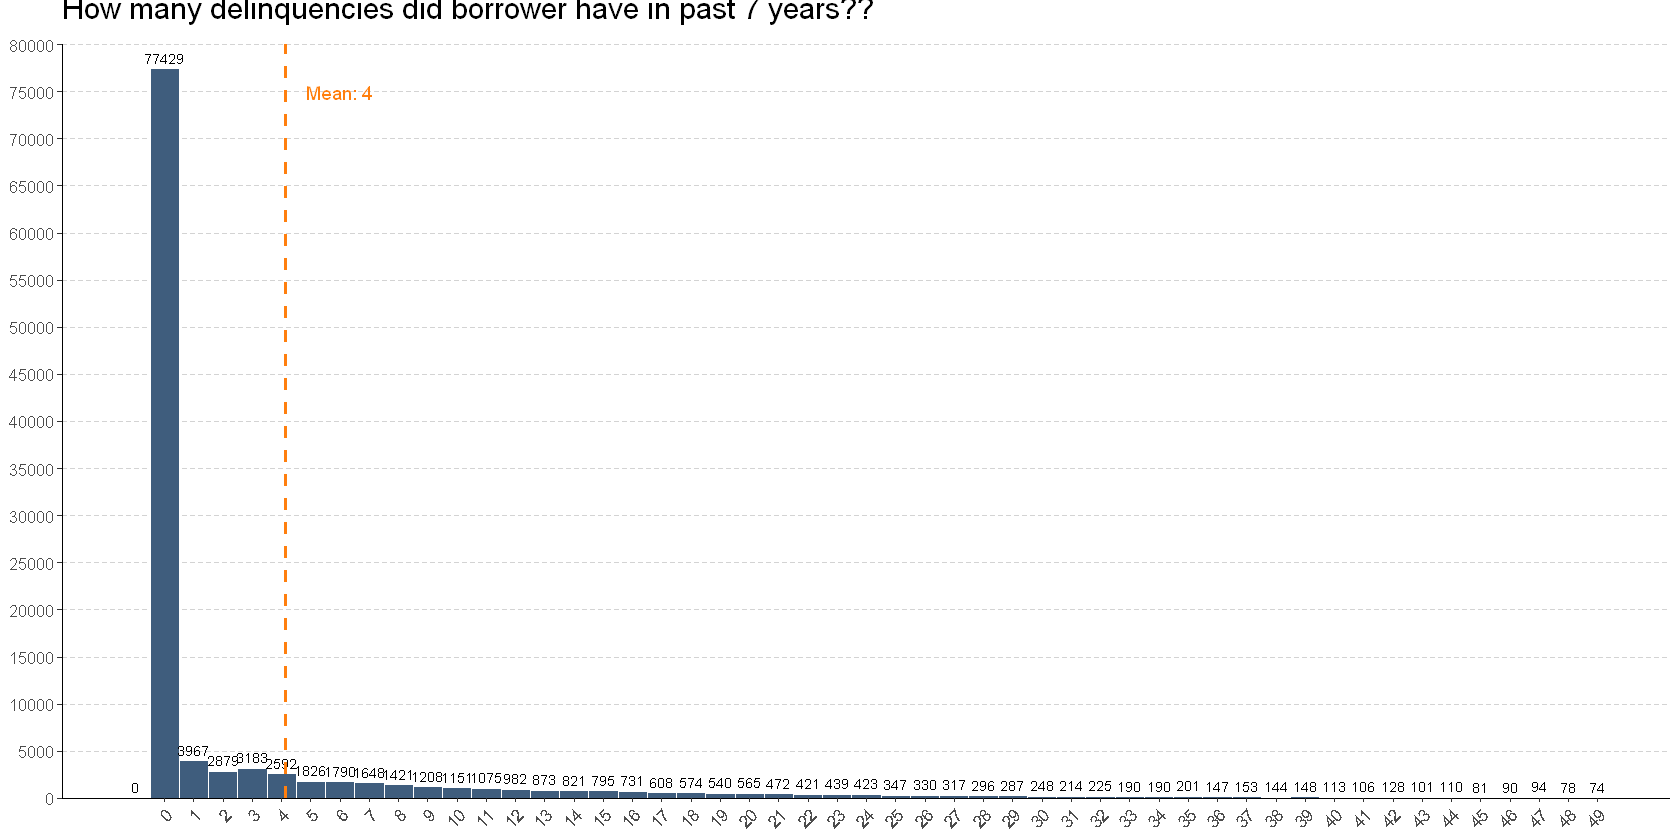

In [63]:
# Delinquencies
limit <- quantile(df$DelinquenciesLast7Years, 0.99)

ggplot(data = df, aes(x = DelinquenciesLast7Years)) +
  geom_histogram(binwidth = 1, color = "#ffffff", fill = "#3F5D7D") +
  stat_bin(binwidth = 1, aes(y=..count.., label=..count..,), geom="text", vjust=-.5, size=3) +
  scale_x_continuous(limits = c(-1, limit), breaks = seq(0, limit, 1)) +
  scale_y_continuous(limits = c(0,80000), breaks = seq(0, 80000, 5000), expand = c(0,0)) +
  labs(title = "How many delinquencies did borrower have in past 7 years??") + 
  theme(plot.title = element_text(size = 18, vjust = 5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  geom_vline(aes(xintercept = mean(DelinquenciesLast7Years)),
            color = "#ff7f0e", linetype = "dashed", size = 1) + 
  annotate("text", x = 6, y = 75000, 
           label = paste("Mean:", round(mean(df$DelinquenciesLast7Years))), size = 4, color = "#ff7f0e")

Warning message:
"Removed 698 rows containing non-finite values (stat_bin)."Warning message:
"Removed 698 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."Warning message:
"Removed 1 rows containing missing values (geom_text)."

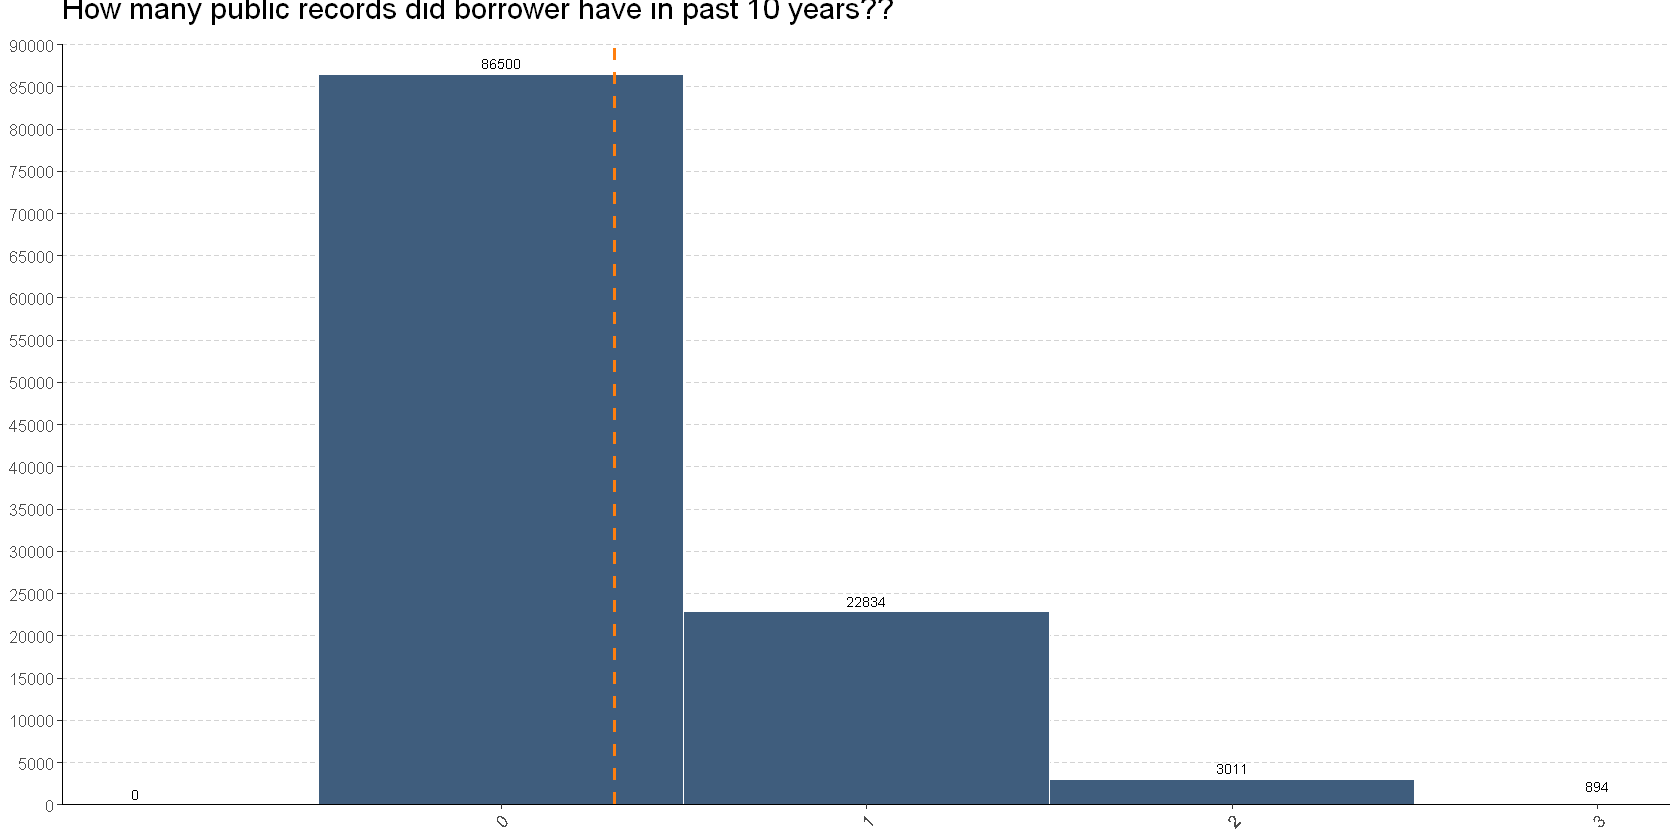

In [70]:
# Public Records
limit <- quantile(df$PublicRecordsLast10Years, 0.99)

ggplot(data = df, aes(x = PublicRecordsLast10Years)) +
  geom_histogram(binwidth = 1, color = "#ffffff", fill = "#3F5D7D") +
  stat_bin(binwidth = 1, aes(y=..count.., label=..count..,), geom="text", vjust=-.5, size=3) +
  scale_x_continuous(limits = c(-1, limit), breaks = seq(0, limit, 1)) +
  scale_y_continuous(limits = c(0,90000), breaks = seq(0, 90000, 5000), expand = c(0,0)) +
  labs(title = "How many public records did borrower have in past 10 years??") + 
  theme(plot.title = element_text(size = 18, vjust = 5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  geom_vline(aes(xintercept = mean(PublicRecordsLast10Years)),
            color = "#ff7f0e", linetype = "dashed", size = 1) + 
  annotate("text", x = 6, y = 75000, 
           label = paste("Mean:", round(mean(df$PublicRecordsLast10Years))), size = 4, color = "#ff7f0e")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    2091    7593   16424   18254 1435667 

Warning message:
"Removed 1140 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1140 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."Warning message:
"Removed 1 rows containing missing values (geom_text)."

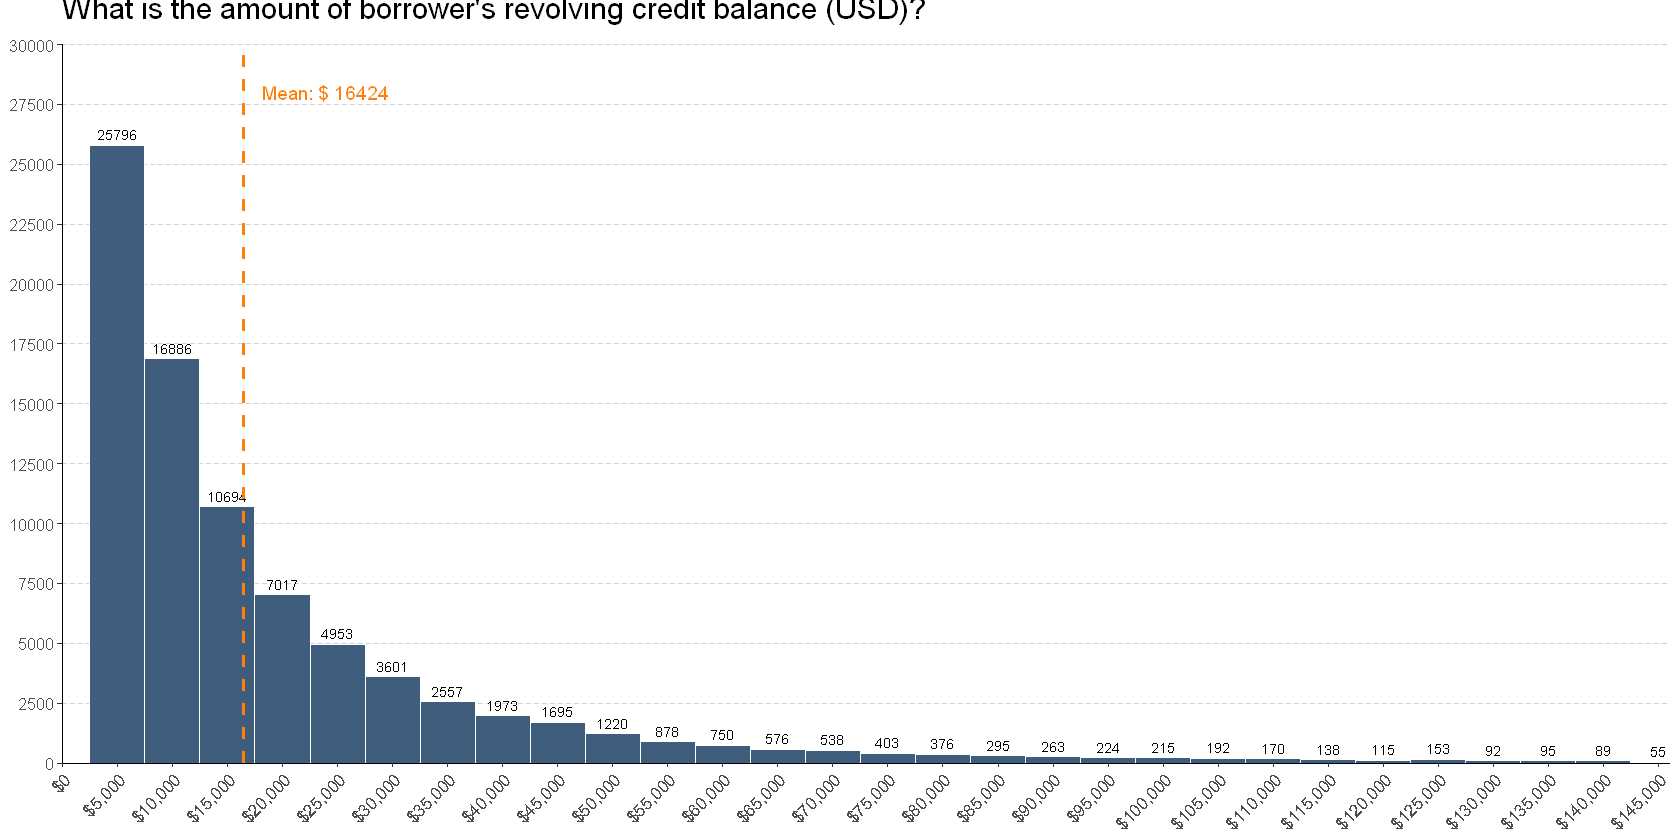

In [86]:
# Revolving Credit Balance
summary(df$RevolvingCreditBalance)

# Revolving Credit Balance
ggplot(aes(x = RevolvingCreditBalance), data = df) +
  geom_histogram(binwidth = 5000, color = "#ffffff", fill = "#3F5D7D") +
  stat_bin(binwidth = 5000, aes(y=..count.., label=..count..,), geom="text", vjust=-.5, size=3) +
  scale_x_continuous(limits = c(0, quantile(df$RevolvingCreditBalance, 0.99)), 
                     breaks = seq(0, 150000, 5000),
                     expand = c(0,0),
                     labels=dollar_format(prefix="$")) +
  scale_y_continuous(limits = c(0,30000), 
                     breaks = seq(0, 30000, 2500), 
                     expand = c(0,0)) +
  labs(title="What is the amount of borrower's revolving credit balance (USD)?") + 
  theme(plot.title = element_text(size = 18, vjust = 5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  geom_vline(aes(xintercept = mean(RevolvingCreditBalance)),
            color = "#ff7f0e", linetype = "dashed", size = 1) + 
  annotate("text", x = 24000, y = 28000, 
           label = paste("Mean: $", round(mean(df$RevolvingCreditBalance))), size = 4, color = "#ff7f0e")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2300  0.5600  0.5238  0.8200  5.9500 

Warning message:
"Removed 190 rows containing non-finite values (stat_bin)."Warning message:
"Removed 190 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."Warning message:
"Removed 1 rows containing missing values (geom_text)."

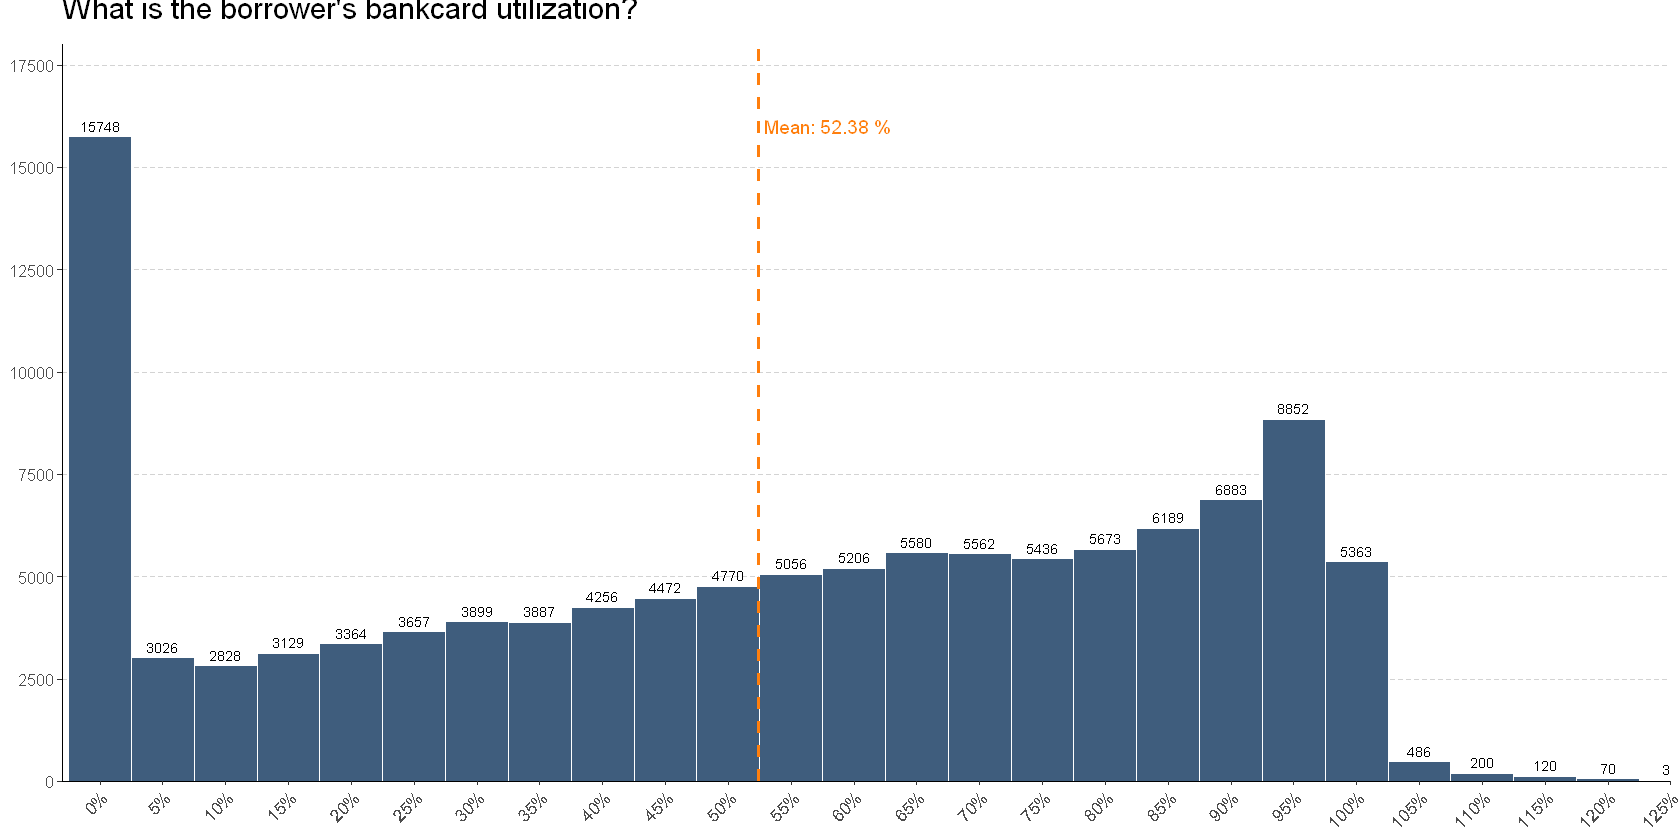

In [120]:
# Bank card Utilization
summary(df$BankcardUtilization)

ggplot(aes(x = BankcardUtilization * 100), data = df) +
  geom_histogram(binwidth = 5, color = "#ffffff", fill = "#3F5D7D") +
  stat_bin(binwidth = 5, aes(y=..count.., label=..count..,), geom="text", vjust=-.5, size=3) +
  scale_x_continuous(limits = c(-3,125), breaks = seq(0, 125, 5), expand = c(0,0), labels=dollar_format(prefix="", suffix="%")) +
  scale_y_continuous(limits = c(0,18000), breaks = seq(0, 18000, 2500), expand = c(0,0)) +
  labs(title="What is the borrower's bankcard utilization?") + 
  theme(plot.title = element_text(size = 18, vjust = 5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  geom_vline(aes(xintercept = mean(BankcardUtilization * 100)),
            color = "#ff7f0e", linetype = "dashed", size = 1) + 
  annotate("text", x = 58, y = 16000, 
           label = paste("Mean:", round(mean(df$BankcardUtilization * 100),2), "%"), size = 4, color = "#ff7f0e")

Resources

[Beautiful plotting in R: A ggplot2 cheatsheet](http://zevross.com/blog/2014/08/04/beautiful-plotting-in-r-a-ggplot2-cheatsheet-3/)  
[Making Maps with R](http://eriqande.github.io/rep-res-web/lectures/making-maps-with-R.html)  
[Top 50 ggplot2 Visualizations - The Master List ](http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html)